<a href="https://colab.research.google.com/github/GauravRana24/Netflix_EDA_Python_Project/blob/main/Netflix_Data_Exploration_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#importing libraries for our purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Insights and Recommendation is given at last of this page**

# **basic steps for data check and datatype and null**

In [36]:
# reading the data file -
data=pd.read_csv('netflix_titles.csv')
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [37]:
#check length of data
len(data)

8807

In [38]:
#check datatypes
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [39]:
#information what data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [40]:
# check shape
data.shape

(8807, 12)

In [41]:
#summary of numeric column data
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [42]:
#summary of category column data and transpose the output for better visuablty
data.describe(include="object").T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [43]:
#all column name in data
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [44]:
#number of unique element in column wise
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [45]:
# checking null values in every column
data.isna().sum()/len(data) * 100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

**Count column wise values**

In [46]:
#checking the occurences of each of the ratings
data['rating'].value_counts(normalize=True)*100

rating
TV-MA       36.430762
TV-14       24.537090
TV-PG        9.803476
R            9.076451
PG-13        5.566284
TV-Y7        3.794161
TV-Y         3.487447
PG           3.260252
TV-G         2.499148
NR           0.908781
G            0.465750
TV-Y7-FV     0.068159
NC-17        0.034079
UR           0.034079
74 min       0.011360
84 min       0.011360
66 min       0.011360
Name: proportion, dtype: float64

In [47]:
# check value of type column
data["type"].value_counts(normalize=True)*100

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

In [48]:
# check which year has highest perc of movie
data["release_year"].value_counts(normalize=True)*100

release_year
2018    13.023731
2017    11.717952
2019    11.695242
2020    10.820938
2016    10.241853
          ...    
1959     0.011355
1925     0.011355
1961     0.011355
1947     0.011355
1966     0.011355
Name: proportion, Length: 74, dtype: float64

In [56]:
# check value of director column
data["director"].value_counts(ascending=False)

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [57]:
# check value of cast column
data["cast"].value_counts(ascending=False)

cast
David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                              

In [58]:
# check value of country column
data["country"].value_counts(ascending=False)

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [59]:
# check value of date_added column
data["date_added"].value_counts(ascending=False)

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

In [60]:
# check value of duration column
data["duration"].value_counts(ascending=False)

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [61]:
# check value of listed_in column
data["listed_in"].value_counts(ascending=False)

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

**Challenges in DATSET**

IN listed_in,country,cast,director columns values are in nested form we need to unnest the data for better analysis

we also see some odd value in rating column we need to replace that values.

director, cast, country  columns have null values

In duration column we need to separate the tv show and movies data for better analysis and need to create bin for years columns

# **Unnesting the nested columns and treatment with null values**

In [65]:
# unnested these columns -- listed_in,country,cast,director columns
# unnesting the directors column, i.e- creating separate lines for each director in a movie
# split the director name by using lambda function and store all director name in list
filter=data["director"].apply(lambda x:str(x).split(", ")).tolist()
#create new dataframe using above director name data where index is title of original data
new_data1=pd.DataFrame(filter,index=data["title"])
#pivot columns into rows using stack function
new_data1=new_data1.stack()
# reset the index of pivot data
new_data1=pd.DataFrame(new_data1.reset_index())
# rename the 0 column name into director name
new_data1.rename(columns={0:"Directors"},inplace=True)
# drop the extra column from data
new_data1.drop(columns=["level_1"],inplace=True)
director_data=new_data1
director_data

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [66]:
# create function to unnest all the columns in data
def convert(y,z):
  # split the director name by using lambda function and store all director name in list
  filter=y.apply(lambda x:str(x).split(", ")).tolist()
  #create new dataframe using above director name data where index is title of original data
  new_data1=pd.DataFrame(filter,index=data["title"])
  #pivot columns into rows using stack function
  new_data1=new_data1.stack()
  # reset the index of pivot data
  new_data1=pd.DataFrame(new_data1.reset_index())
  # rename the 0 column name into director name
  new_data1.rename(columns={0:z},inplace=True)
  # drop the extra column from data
  new_data1.drop(columns=["level_1"],inplace=True)
  return new_data1

In [67]:
# store all the cast name in y variable and pass that y variable in convert function
y=data["cast"]
cast_data=convert(y,z="Actors")
cast_data

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [68]:
# store all the listed_id name in y variable and pass that y variable in convert function
y=data["listed_in"]
listed_data=convert(y,z="Genre")
listed_data

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [69]:
# store all the country name in y variable and pass that y variable in convert function
y=data["country"]
country_data=convert(y,z="Country")
country_data

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


**merging all unnested data**

In [70]:
#merging the unnested director data with unnested actors data
dir_cast_data=cast_data.merge(director_data,on=['title'],how='inner')
#merging the above merged data with unnested genre data
dir_cast_gen_data=dir_cast_data.merge(listed_data,on=['title'],how='inner')
#merging the above merged data with unnested country data
final_merge_data=dir_cast_gen_data.merge(country_data,on=['title'],how='inner')
final_merge_data

,title,Actors,Directors,Genre,Country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa
...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India


In [71]:
# checking all the column name of new data
final_merge_data.columns

Index(['title', 'Actors', 'Directors', 'Genre', 'Country'], dtype='object')

In [72]:
#replacing nan values of director and actor by Unknown Actor and Director
final_merge_data["Actors"].replace(["nan"],["Unknown Actor"],inplace=True)
final_merge_data["Directors"].replace(['nan'],['Unknown Director'],inplace=True)
final_merge_data["Country"].replace(['nan'],[np.nan],inplace=True)
final_merge_data.head()

,title,Actors,Directors,Genre,Country
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa


In [73]:
#merging our unnested data with the original data
filter_data=data[['show_id', 'type', 'title', 'date_added','release_year', 'rating', 'duration']]
final_data=final_merge_data.merge(filter_data,on=["title"],how="left")
final_data.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [74]:
# now checking nulls
final_data.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
Country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [75]:
'''In duration column, it was observed that the nulls had values which were written in corresponding ratings column,
i.e- you can't expect ratings to be in min. So the duration column nulls are replaced by corresponding values in ratings column'''
final_data[final_data["duration"].isnull()]

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,74 min,NaN
131603,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,84 min,NaN
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,66 min,NaN


In [76]:
#duration column nulls are replaced by corresponding values in ratings column
final_data.loc[final_data["duration"].isnull(),"duration"]=final_data.loc[final_data["duration"].isnull(),"duration"].fillna(final_data['rating'])

In [77]:
#checking null value again
final_data.isna().sum()

title               0
Actors              0
Directors           0
Genre               0
Country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [78]:
#check value count in rating column
final_data["rating"].value_counts(ascending=True)

rating
66 min          1
84 min          1
74 min          1
UR             86
TV-Y7-FV       86
NC-17         149
G            1530
NR           1573
TV-G         2779
TV-Y         3665
TV-Y7        6304
PG          10919
TV-PG       14926
PG-13       16246
R           25860
TV-14       43931
TV-MA       73867
Name: count, dtype: int64

In [79]:
#Ratings can't be in min, so it has been made NR(i.e- Non Rated)
final_data.loc[final_data['rating'].str.contains('min', na=False),'rating']='NR'
final_data["rating"].value_counts(ascending=True)

rating
TV-Y7-FV       86
UR             86
NC-17         149
G            1530
NR           1576
TV-G         2779
TV-Y         3665
TV-Y7        6304
PG          10919
TV-PG       14926
PG-13       16246
R           25860
TV-14       43931
TV-MA       73867
Name: count, dtype: int64

In [80]:
# fill null value from NA
final_data['rating'].fillna('NR',inplace=True)
final_data.isna().sum()
# only 2 column left with null values

title               0
Actors              0
Directors           0
Genre               0
Country         11897
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

In [81]:
#check nulls in date_added column
final_data[final_data['date_added'].isnull()].head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
136893,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136894,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136895,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136896,A Young Doctor's Notebook and Other Stories,Jon Hamm,Unknown Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136897,A Young Doctor's Notebook and Other Stories,Jon Hamm,Unknown Director,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons


In [84]:
'''date added column is imputed on the basis of release year,i.e- suppose there is a null value for date_added
when release year was 2013.So below piece of code just checks the mode of date added for release year=2013
 and imputes in place of nulls the corresponding mode'''
for i in final_data[final_data['date_added'].isnull()]['release_year'].unique():
  imputer=final_data[final_data['release_year']==i]['date_added'].mode().values[0]
  final_data.loc[final_data['release_year']==i,'date_added']=final_data.loc[final_data['release_year']==i,'date_added'].fillna(imputer)

In [85]:
#check null value in date_added column
final_data["date_added"].isna().sum()

0

In [86]:
'''country column is imputed on the basis of director,i.e- suppose there's a null for country
when we have a director whose other movies have a country given.So below piece of code just checks the mode of
country for the director and imputes in place of nulls the corresponding mode'''
for i in final_data[final_data['Country'].isnull()]['Directors'].unique():
  if i in final_data[final_data['Country'].isnull()]['Directors'].unique():
    # Check if the result is not empty before accessing its elements
    mode_values=final_data[final_data["Directors"]==i]["Country"].mode().values
    if len(mode_values) > 0:
      imputer=mode_values[0]
    else:
       # Handle the case when the result is empty (e.g., set imputer to a default value)
      imputer="Unknown Country"
    final_data.loc[final_data['Directors']==i,'Country']=final_data.loc[final_data['Directors']==i,'Country'].fillna(imputer)

In [87]:
# all null values sorted no null value left
final_data.isna().sum()

title           0
Actors          0
Directors       0
Genre           0
Country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [88]:
#check data after doing all preprocessing
final_data.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


**check all columns **

In [89]:
final_data.columns

Index(['title', 'Actors', 'Directors', 'Genre', 'Country', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration'],
      dtype='object')

In [92]:
# check the total rows in data
total=len(final_data)

In [93]:
# movie and tv data
movie=len(final_data[final_data["type"]=="Movie"])
tv=len(final_data[final_data["type"]=="TV Show"])
if movie+tv==total:
  print("data is complete and divide according to thier type")

data is complete and divide according to thier type


# **Analysis based on type of content**

In [414]:
# separate the dataset fro movies and tvshow
movies_data=final_data[final_data["type"]=="Movie"]
tv_data=final_data[final_data["type"]=="TV Show"]

In [420]:
# check len of movie data
len(movies_data)

145843

In [419]:
# check len of tv data
len(tv_data)

56148

In [421]:
# check len of all data
len(final_data)

201991

In [422]:
len(movies_data) + len(tv_data)

201991

In [423]:
# percentage of movie data
len(movies_data)/len(final_data)*100

72.20272190345113

In [424]:
# percentage of movie data
len(tv_data)/len(final_data)*100

27.797278096548855

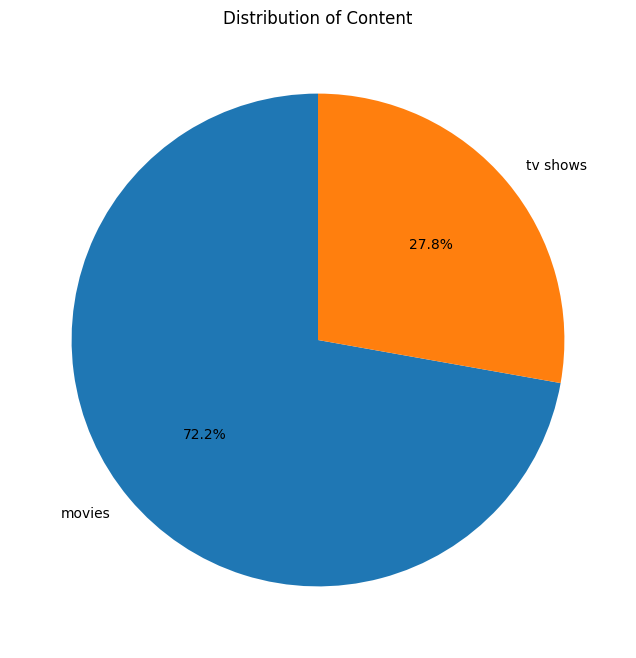

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
data=final_data["type"].value_counts()
plt.figure(figsize=(15,8))
plt.title("Distribution of Content")
plt.pie(data,labels=["movies","tv shows"],autopct='%1.1f%%',startangle=90)
plt.show()
## 72% are movies in dataset

**we have 72:28 ratio of movies and tv shows in our data**

# **Comparison of tv shows vs. movies.**

## **Analysis based on actor**

In [141]:
final_data.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year,month,weekday,day
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min,2021,9,5,25
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24


In [348]:
# grouping all data according to actor
actor_data=final_data.groupby("Actors").agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
actor_data

,Actors,title
34214,Unknown Actor,825
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
...,...,...
14221,Jamie Lee,1
14219,Jamie Kenna,1
14218,Jamie Kaler,1
14217,Jamie Johnston,1


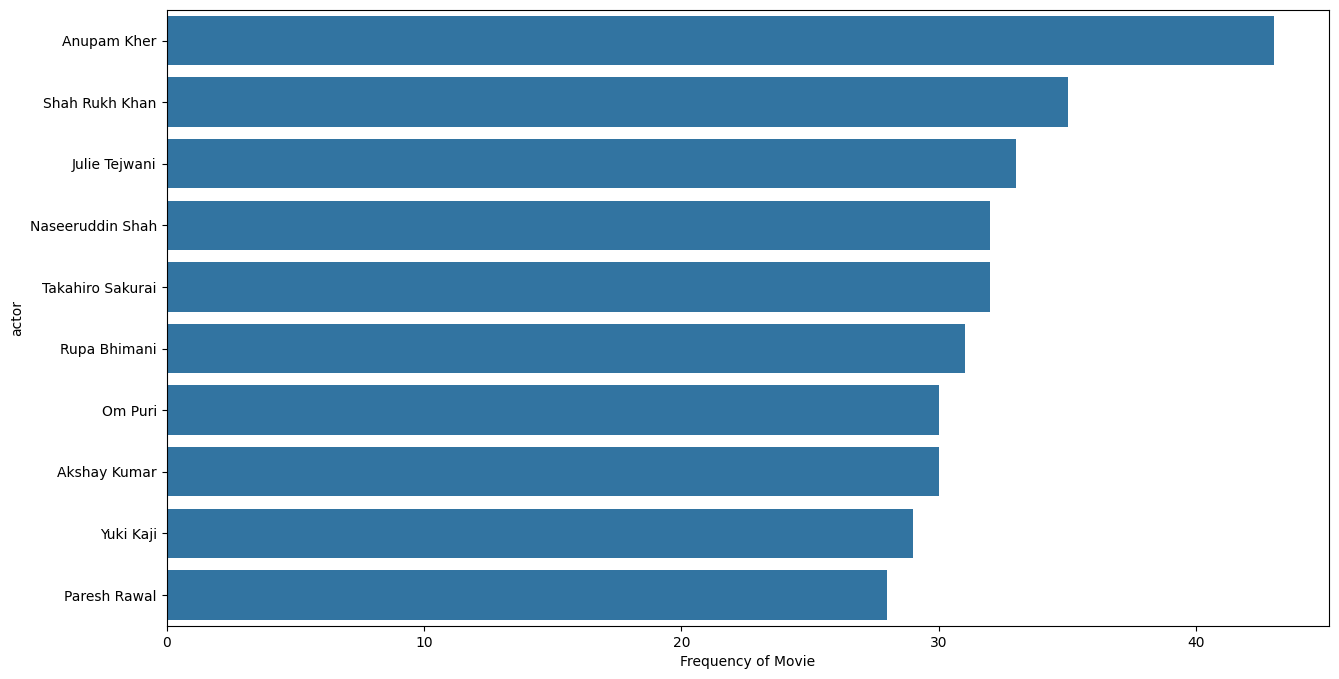

In [342]:
plt.figure(figsize=(15,8))
sns.barplot(actor_data[1:11],x="title",y="Actors")
plt.xlabel('Frequency of Movie')
plt.ylabel('actor')
plt.show()

**Anupam Kher,SRK,Julie Tejwani, Naseeruddin Shah and Takahiro Sakurai are top actors**

In [343]:
# separate the dataset fro movies and tvshow
movies_data=final_data[final_data["type"]=="Movie"]
tv_data=final_data[final_data["type"]=="TV Show"]

In [344]:
# group the movies data according to actors
data1=movies_data.groupby("Actors")['title'].nunique()
# sort the value and drop extra columns
data1_sort=data1.sort_values(ascending=False).reset_index()
data1_sort=data1_sort
data1_sorted=data1_sort.reset_index().drop(columns={"index"})
data1_sorted.head(10)

,Actors,title
0,Unknown Actor,475
1,Anupam Kher,42
2,Shah Rukh Khan,35
3,Naseeruddin Shah,32
4,Om Puri,30
5,Akshay Kumar,30
6,Paresh Rawal,28
7,Julie Tejwani,28
8,Amitabh Bachchan,28
9,Rupa Bhimani,27


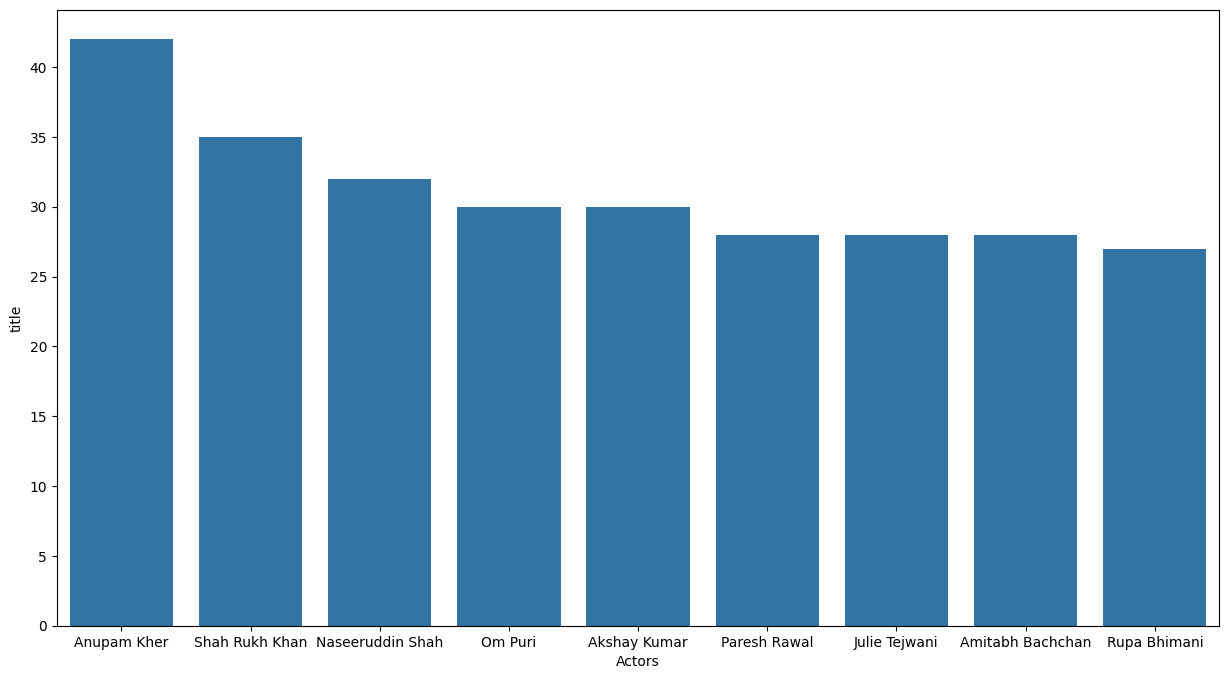

In [345]:
# visual presentation of data
plt.figure(figsize=(15,8))
sns.barplot(data1_sorted[1:10],x="Actors",y="title")
plt.show()

In [346]:
# group the TVSHOW data according to actors
data1=tv_data.groupby("Actors")['title'].nunique()
# sort the value and drop extra columns
data1_sort=data1.sort_values(ascending=False).reset_index()
data1_sort=data1_sort
data1_sorted=data1_sort.reset_index().drop(columns={"index"})
data1_sorted

,Actors,title
0,Unknown Actor,350
1,Takahiro Sakurai,25
2,Yuki Kaji,19
3,Junichi Suwabe,17
4,Daisuke Ono,17
...,...,...
14859,Ivy Yin,1
14860,Iván Pellicer,1
14861,Iván Álvarez de Araya,1
14862,Iza Moreira,1


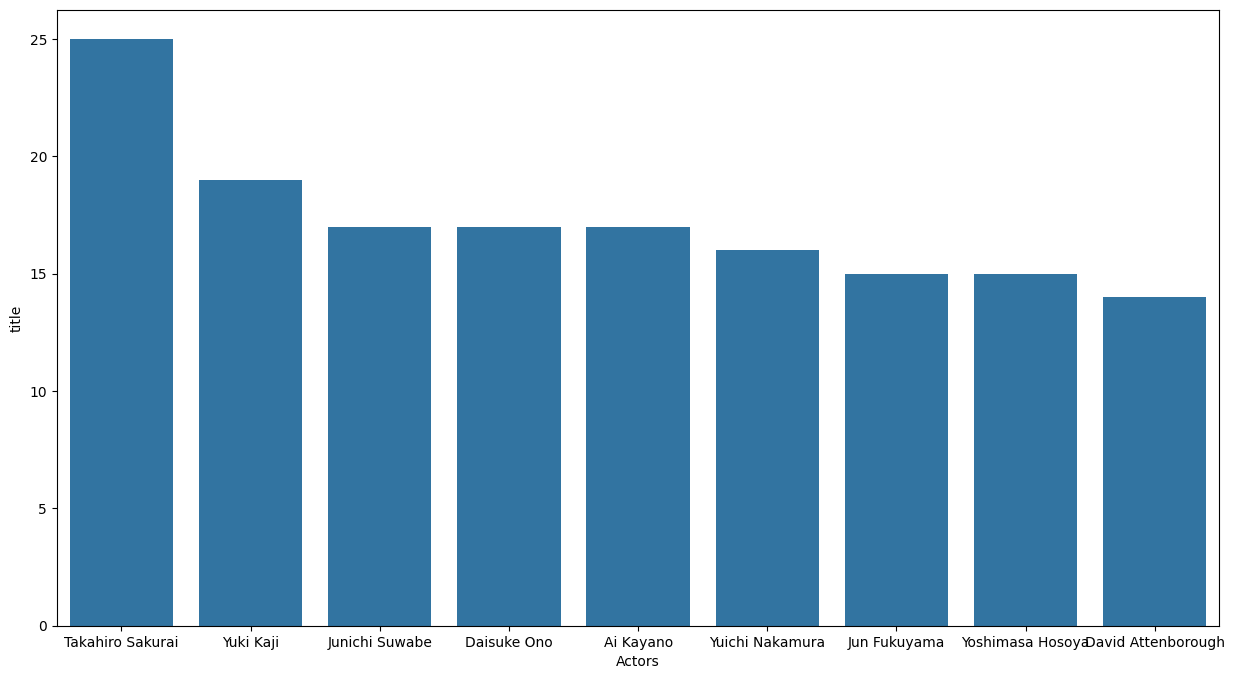

In [347]:
# visual presentation of data
plt.figure(figsize=(15,8))
sns.barplot(data1_sorted[1:10],x="Actors",y="title")
plt.show()

## **Analysis bASED ON directors**

In [145]:
final_data.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year,month,weekday,day
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min,2021,9,5,25
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24


In [349]:
#number of TITLES by each director
director_data=final_data.groupby("Directors").agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
director_data

,Directors,title
4744,Unknown Director,2634
3749,Rajiv Chilaka,22
1906,Jan Suter,21
3800,Raúl Campos,19
2866,Marcus Raboy,16
...,...,...
635,Brandon Camp,1
2295,Juan Antin,1
2296,Juan Antonio de la Riva,1
2297,Juan Camilo Pinzon,1


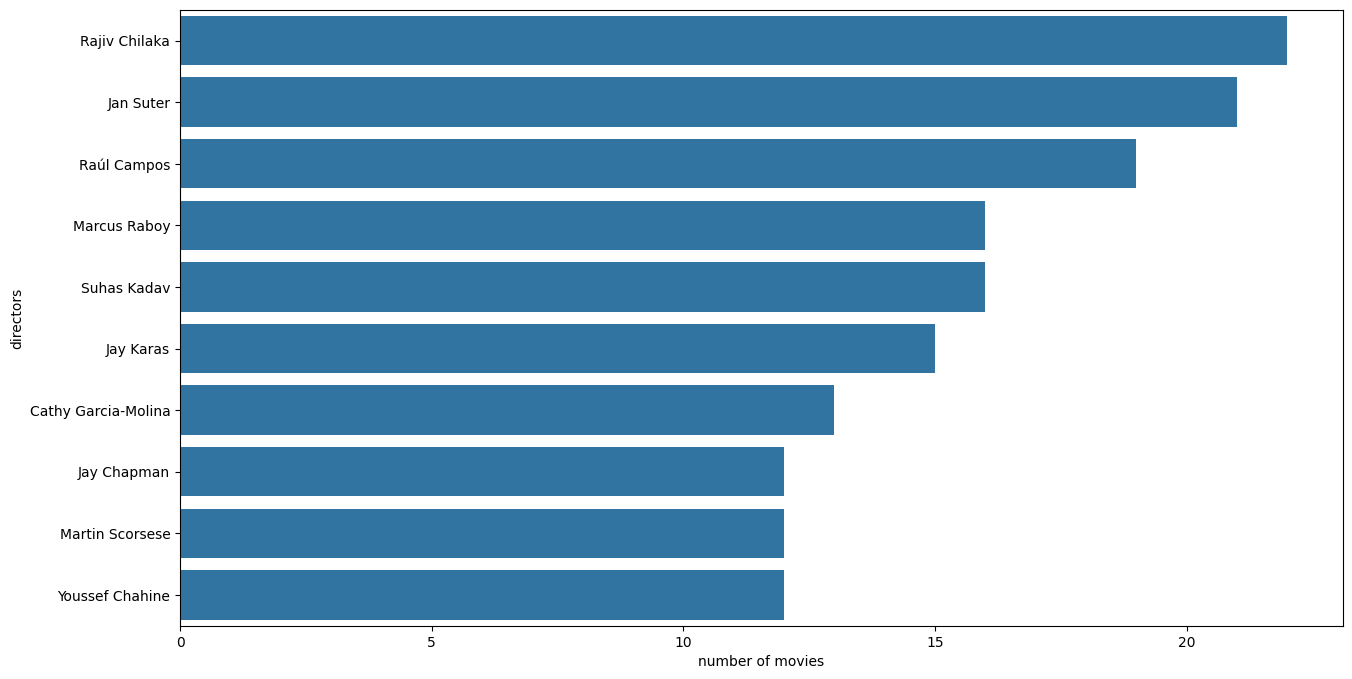

In [147]:
plt.figure(figsize=(15,8))
sns.barplot(director_data[1:11],x="title",y="Directors")
plt.xlabel('number of movies')
plt.ylabel('directors')
plt.show()

**Rajiv Chilaka, Jan Suter and Raul Campos are the most popular directors across Netflix**

In [350]:
# separate the dataset fro movies and tvshow
movies_data=final_data[final_data["type"]=="Movie"]
tv_data=final_data[final_data["type"]=="TV Show"]

In [351]:
# group the movies data according to Directors
data1=movies_data.groupby("Directors")['title'].nunique()
# sort the value and drop extra columns
data1_sort=data1.sort_values(ascending=False).reset_index()
data1_sort=data1_sort
data1_sorted=data1_sort.reset_index().drop(columns={"index"})
data1_sorted.head()

,Directors,title
0,Unknown Director,188
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16


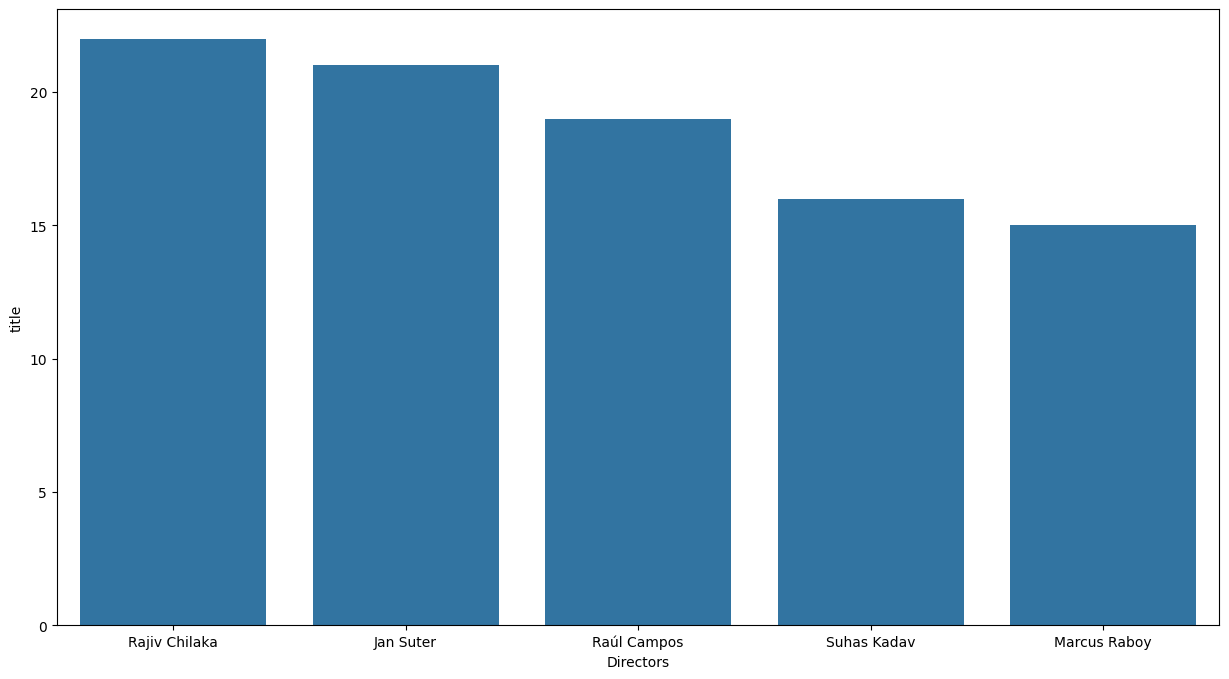

In [353]:
# visual presentation of data
plt.figure(figsize=(15,8))
sns.barplot(data1_sorted[1:6],x="Directors",y="title")
plt.show()


In [354]:
# group the tvshow data according to Directors
data1=tv_data.groupby("Directors")['title'].nunique()
# sort the value and drop extra columns
data1_sort=data1.sort_values(ascending=False).reset_index()
data1_sort=data1_sort
data1_sorted=data1_sort.reset_index().drop(columns={"index"})
data1_sorted.head()

,Directors,title
0,Unknown Director,2446
1,Ken Burns,3
2,Alastair Fothergill,3
3,Stan Lathan,2
4,Joe Berlinger,2


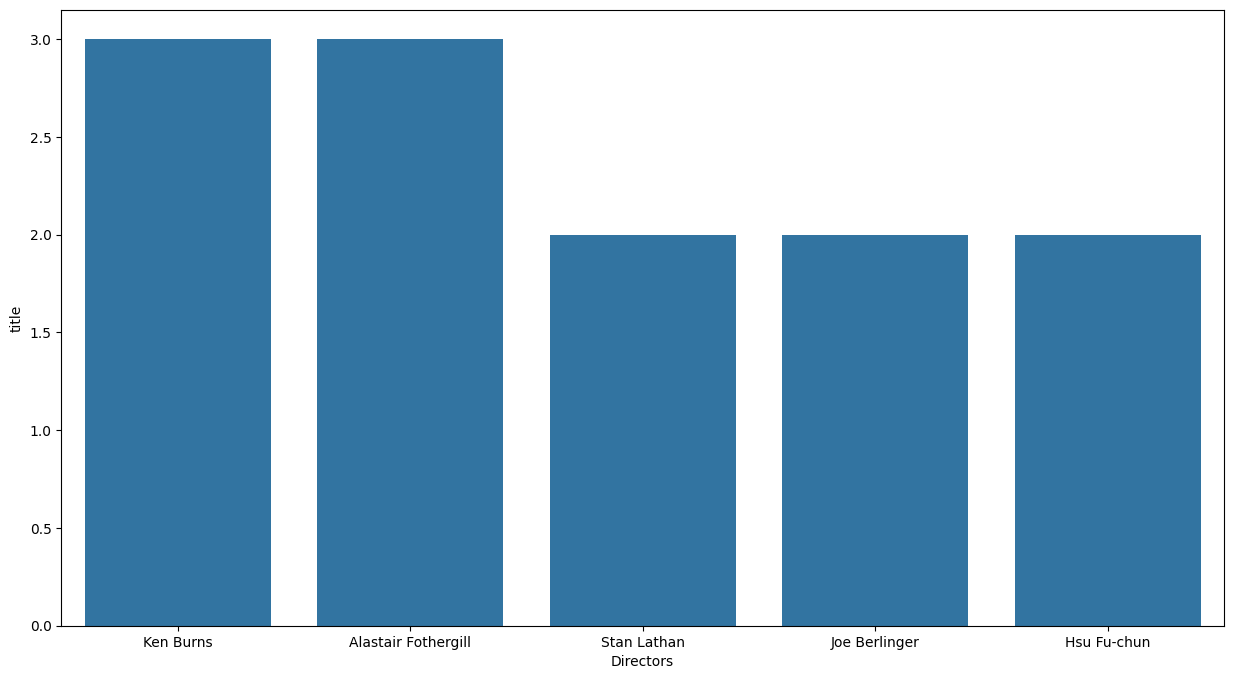

In [355]:
# visual presentation of data
plt.figure(figsize=(15,8))
sns.barplot(data1_sorted[1:6],x="Directors",y="title")
plt.show()

## **ANALYSIS BASED ON GENRES**

In [119]:
final_data.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year,month,weekday,day
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min,2021,9,5,25
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24


In [121]:
# group the data according to genres
genre_data=final_data.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
len(genre_data)
# 42 genre are present in our data

42

In [122]:
genre_data=genre_data[:15]
genre_data

,Genre,title
16,International Movies,2752
12,Dramas,2427
7,Comedies,1674
17,International TV Shows,1351
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,763
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


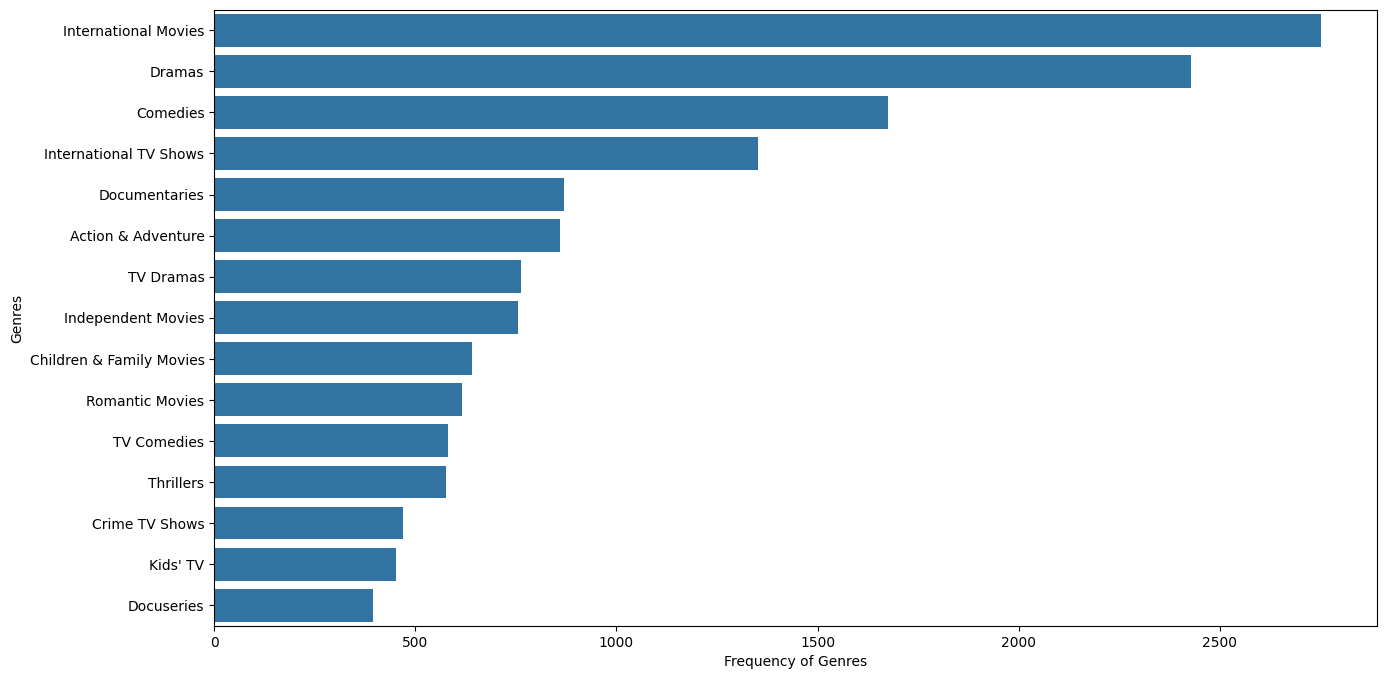

In [123]:
plt.figure(figsize=(15,8))
sns.barplot(genre_data,x="title",y="Genre")
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

In [124]:
# top 3 genre
popular=["International Movies","Dramas","Comedies"]
# find total content in top 3 genres
topgenre_content=genre_data[genre_data["Genre"].isin(popular)]["title"].sum()
# total content available in all genres
total_content=genre_data["title"].sum()
# percentage of content from top 3 genre
topgenre_content/total_content*100

45.13898037149256

**International Movies, Dramas and Comedies are the most popular and 45% content are from  these genres**

In [356]:
# separate the dataset fro movies and tvshow
movies_data=final_data[final_data["type"]=="Movie"]
tv_data=final_data[final_data["type"]=="TV Show"]

In [357]:
# group the movies data according to Genre
data1=movies_data.groupby("Genre")['title'].nunique()
# sort the value and drop extra columns
data1_sort=data1.sort_values(ascending=False).reset_index()
data1_sort=data1_sort
data1_sorted=data1_sort.reset_index().drop(columns={"index"})
data1_sorted.head()

,Genre,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859


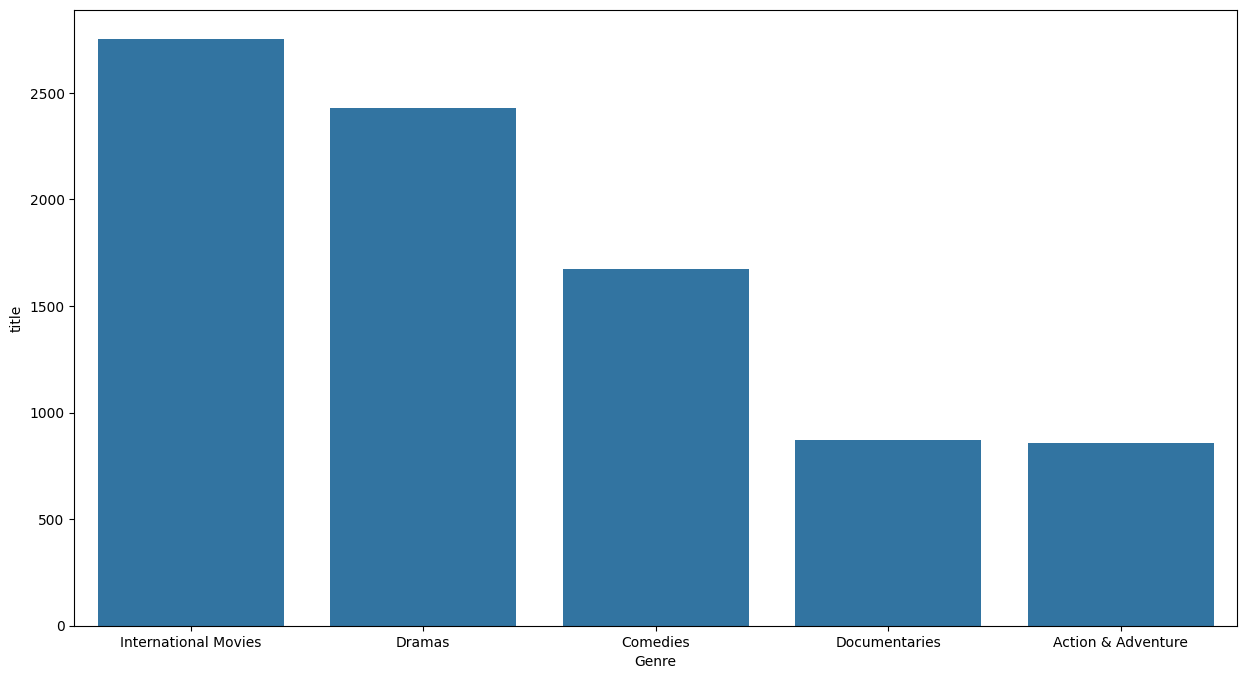

In [358]:
# visual presentation of data
plt.figure(figsize=(15,8))
sns.barplot(data1_sorted[:5],x="Genre",y="title")
plt.show()


In [359]:
# group the TV data according to Genre
data1=tv_data.groupby("Genre")['title'].nunique()
# sort the value and drop extra columns
data1_sort=data1.sort_values(ascending=False).reset_index()
data1_sort=data1_sort
data1_sorted=data1_sort.reset_index().drop(columns={"index"})
data1_sorted.head()

,Genre,title
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451


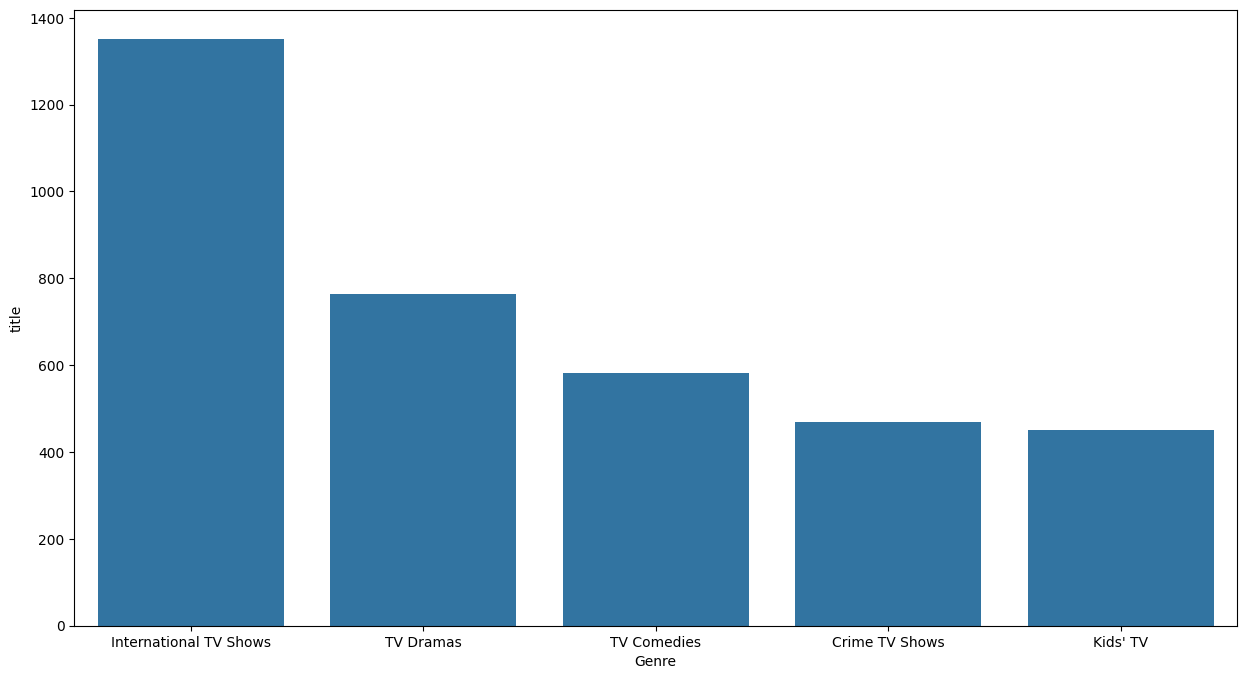

In [361]:
# visual presentation of data
plt.figure(figsize=(15,8))
sns.barplot(data1_sorted[:5],x="Genre",y="title")
plt.show()

## **Analysis based on country**

In [425]:
final_data.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year,month,weekday,day
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min,2021,9,5,25
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24


In [426]:
# group data by country
country_data=final_data.groupby("Country").agg({"title":"nunique"})
country_data

,title
Country,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,1
...,...
Vatican City,1
Venezuela,4
Vietnam,7


In [427]:
country_data=country_data.reset_index()

In [428]:
# all the unique value in country column
country_data["Country"].unique()

array(['', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bangladesh', 'Belarus', 'Belgium', 'Bermuda', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt',
       'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Malawi', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Mongolia',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Ni

**we are seeing countries, such as Cambodia and Cambodia, or United States and United States, are shown as different countries.They should have been same**

In [429]:
country_data

,Country,title
0,,3
1,Afghanistan,1
2,Albania,1
3,Algeria,3
4,Angola,1
...,...,...
119,Vatican City,1
120,Venezuela,4
121,Vietnam,7
122,West Germany,5


In [430]:
# replace the extra word from the country name
final_data['Country'] = final_data['Country'].str.replace(',', '')

In [431]:
country_data=final_data.groupby("Country").agg({"title":"nunique"})

In [432]:
country_data=country_data.reset_index()

In [433]:
# sort the number of movie per country
Country_data=country_data.sort_values(by="title",ascending=False)
Country_data

,Country,title
116,United States,4133
46,India,1116
115,United Kingdom,811
21,Canada,448
37,France,396
...,...,...
53,Jamaica,1
97,Slovakia,1
99,Somalia,1
35,Ethiopia,1


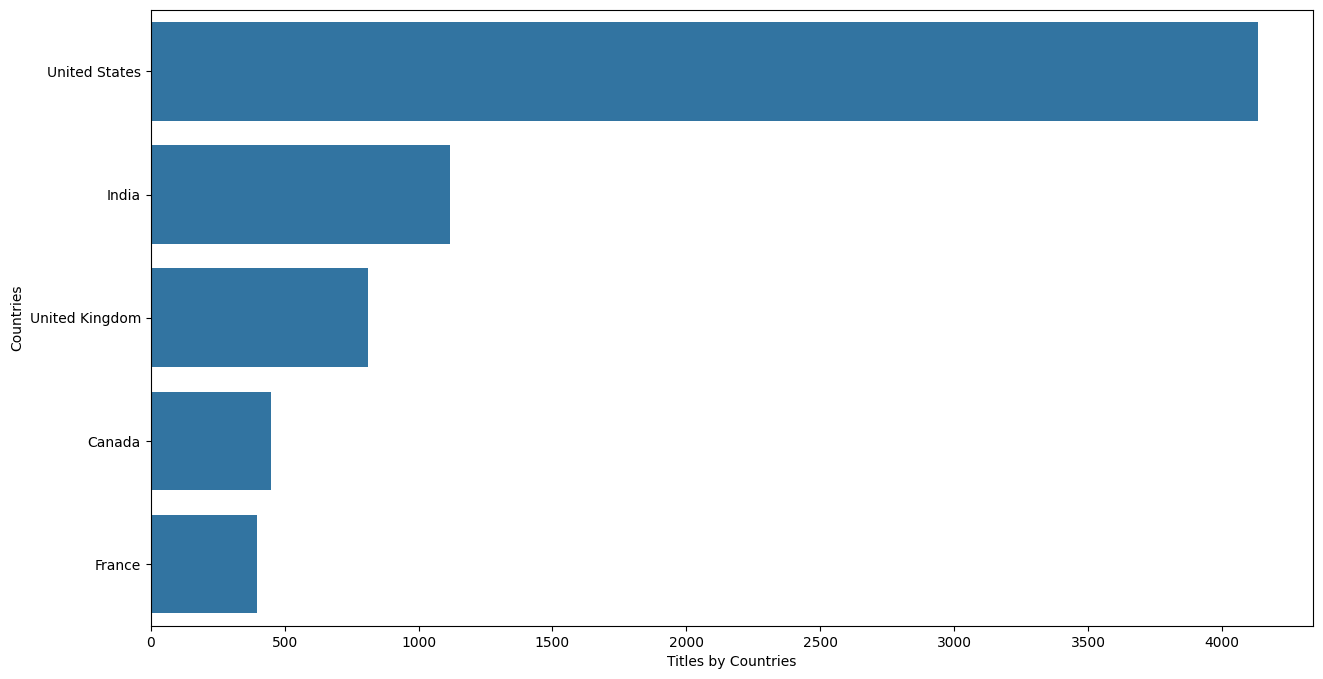

In [434]:
plt.figure(figsize=(15,8))
sns.barplot(Country_data[:5],x="title",y="Country")
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

In [435]:
# top countries
top_country=["United States","India","United Kingdom"]
# find total content in top countries
topcon_content=Country_data[Country_data["Country"].isin(top_country)]["title"].sum()
topcon_content
# total content from all country
total_content=Country_data["title"].sum()
total_content
# percentage of content from top country
topcon_content/total_content*100

55.83195135433942

**56% content available on netlfix are from 3 countries us,india,uk**

In [436]:
# separate the dataset fro movies and tvshow
movies_data=final_data[final_data["type"]=="Movie"]
tv_data=final_data[final_data["type"]=="TV Show"]

In [437]:
# group the movies data according to country
data1=movies_data.groupby("Country")['title'].nunique()
# sort the value and drop extra columns
data1_sort=data1.sort_values(ascending=False).reset_index()
data1_sort=data1_sort
data1_sorted=data1_sort.reset_index().drop(columns={"index"})
data1_sorted.head()

,Country,title
0,United States,2840
1,India,1031
2,United Kingdom,538
3,Canada,322
4,France,305


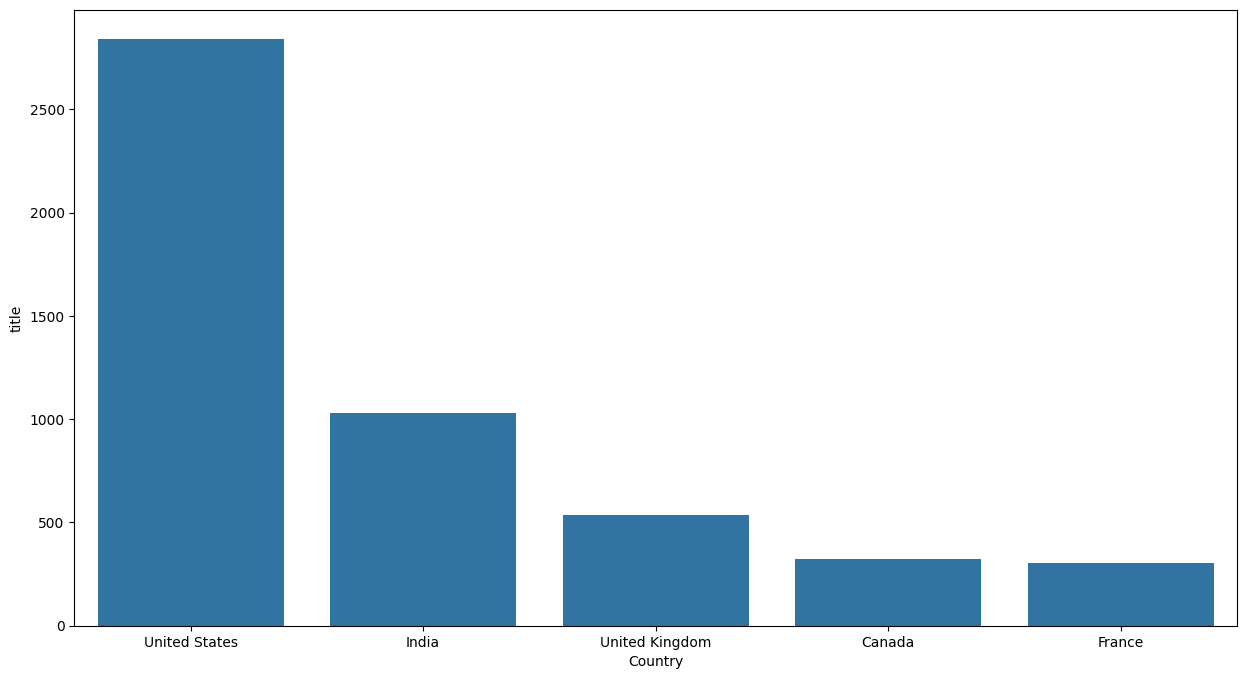

In [438]:
# visual presentation of data
plt.figure(figsize=(15,8))
sns.barplot(data1_sorted[:5],x="Country",y="title")
plt.show()


In [439]:
# group the tv data according to country
data1=tv_data.groupby("Country")['title'].nunique()
# sort the value and drop extra columns
data1_sort=data1.sort_values(ascending=False).reset_index()
data1_sort=data1_sort
data1_sorted=data1_sort.reset_index().drop(columns={"index"})
data1_sorted.head()

,Country,title
0,United States,1293
1,United Kingdom,273
2,Japan,199
3,South Korea,170
4,Canada,126


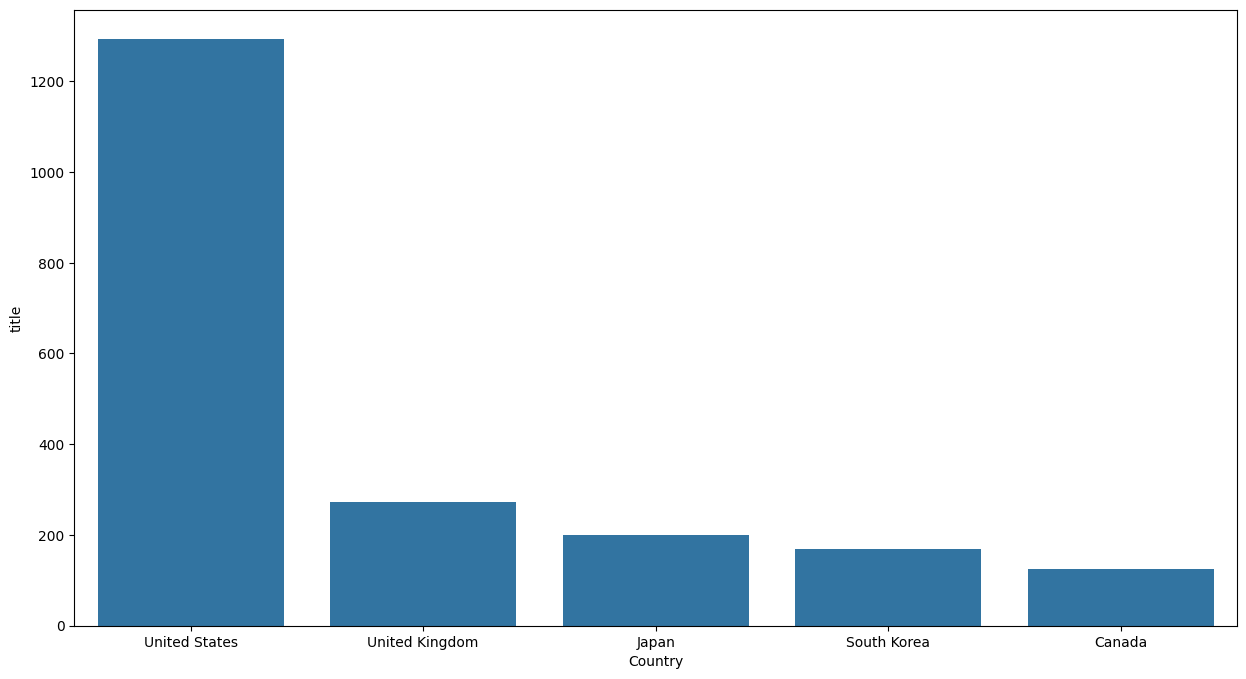

In [440]:
# visual presentation of data
plt.figure(figsize=(15,8))
sns.barplot(data1_sorted[:5],x="Country",y="title")
plt.show()

## **Analysis  of date_added**

In [372]:
final_data["date_added"]=pd.to_datetime(final_data["date_added"])

In [373]:
# convert str fromat into datetime of date column
type(final_data["date_added"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [374]:
# extarct year , month and week day from dateadded column
final_data["year"]=final_data["date_added"].dt.year
final_data["month"]=final_data["date_added"].dt.month
# weekday start from monday = 0 and sunday =6
final_data["weekday"]=final_data["date_added"].dt.weekday
final_data["day"]=final_data["date_added"].dt.day
final_data.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year,month,weekday,day
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min,2021,9,5,25
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24


In [375]:
len(final_data)

201991

In [376]:
final_data["year"].max()

2021

In [377]:
final_data["year"].min()

2008

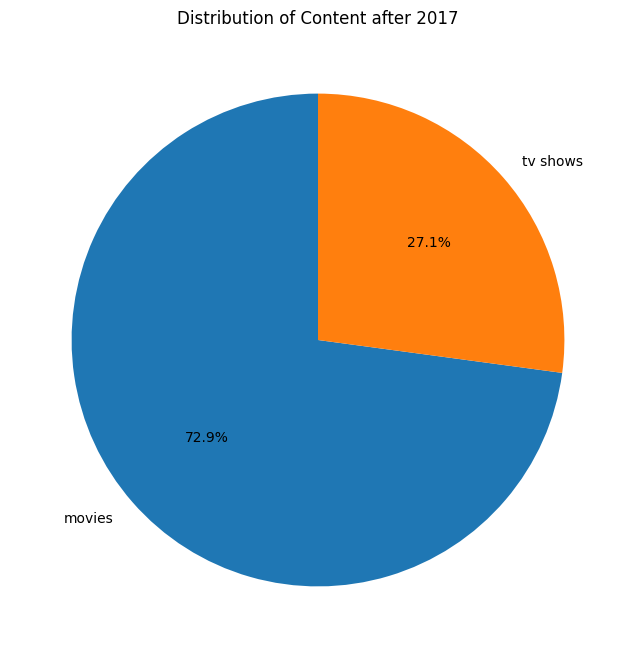

In [378]:
# type of content added after 2017
data_after_2017=final_data[final_data["year"]>=2017]
data=data_after_2017["type"].value_counts()
plt.figure(figsize=(15,8))
plt.title("Distribution of Content after 2017")
plt.pie(data,labels=["movies","tv shows"],autopct='%1.1f%%',startangle=90)
plt.show()

last 5 year the ratio of movies and tv shows in our data is almost same as 72:28

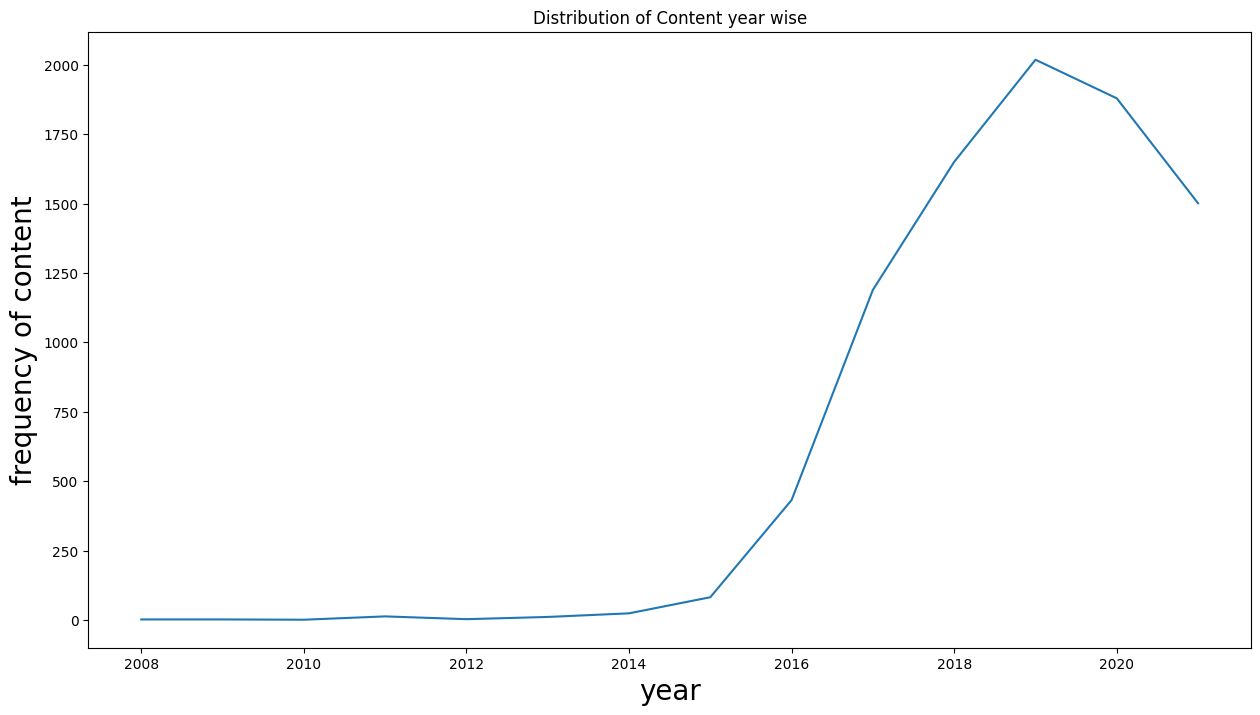

In [379]:
# year wise content upload on netflix
data=final_data.groupby("year").agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)
plt.figure(figsize=(15,8))
plt.title("Distribution of Content year wise")
sns.lineplot(data,x="year",y="title")
plt.xlabel('year',size=20)
plt.ylabel('frequency of content',size=20)
plt.show()

In [380]:
dataafter_2016=final_data[final_data["year"]>2016]["year"].value_counts()/len(final_data)*100
dataafter_2016.sum()

94.3690560470516

**94% content available on netflix is uploaded after 2016 and then decreasing after 2019 probably because of covid**

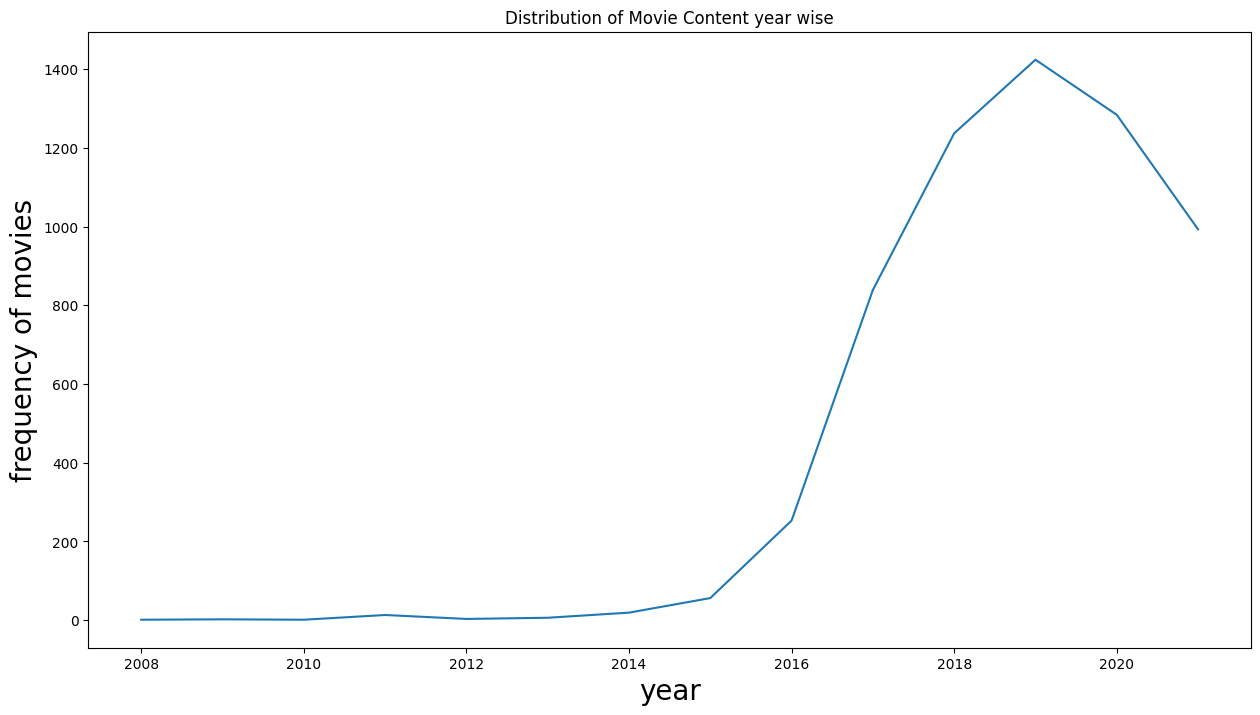

In [381]:
# YEAR WISE content upload on netflix only for movie type
movies_data=final_data[final_data["type"]=="Movie"]
data=movies_data.groupby("year").agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)
plt.figure(figsize=(15,8))
plt.title("Distribution of Movie Content year wise")
sns.lineplot(data,x="year",y="title")
plt.xlabel('year',size=20)
plt.ylabel('frequency of movies',size=20)
plt.show()

In [382]:
# percenatge of movies upload on netflix after 2016
movieafter_2016=movies_data[movies_data["year"]>2016]["year"].value_counts()/len(movies_data)*100
movieafter_2016.sum()

95.2394012739727

**out of total movies 95% movies are uploaded after 2016**

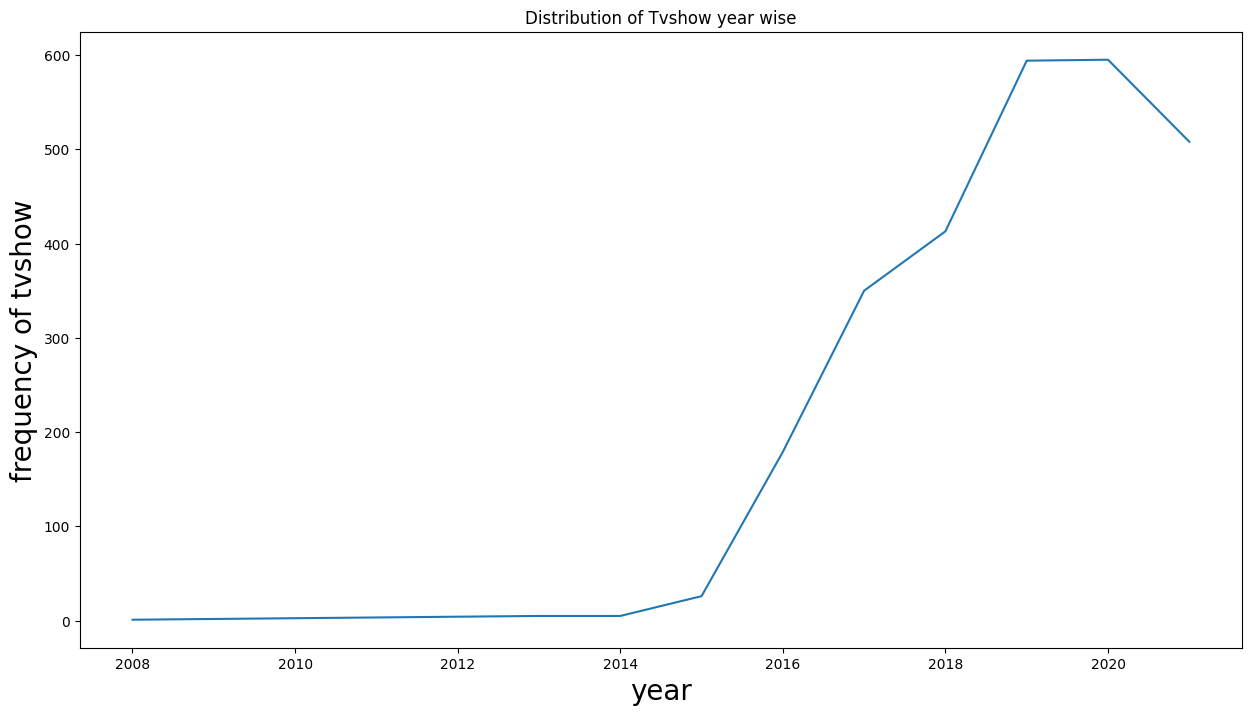

In [383]:
# YEAR WISE content upload on netflix only for tvshow type
tv_data=final_data[final_data["type"]=="TV Show"]
data=tv_data.groupby("year").agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)
plt.figure(figsize=(15,8))
plt.title("Distribution of Tvshow year wise")
sns.lineplot(data,x="year",y="title")
plt.xlabel('year',size=20)
plt.ylabel('frequency of tvshow',size=20)
plt.show()

In [384]:
# percenatge of tv show upload on netflix after 2016
tvshowafter_2016=tv_data[tv_data["year"]>2016]["year"].value_counts()/len(tv_data)*100
tvshowafter_2016.sum()

92.10835648642873

out of total tvshows 92% tvshows are uploaded after 2016

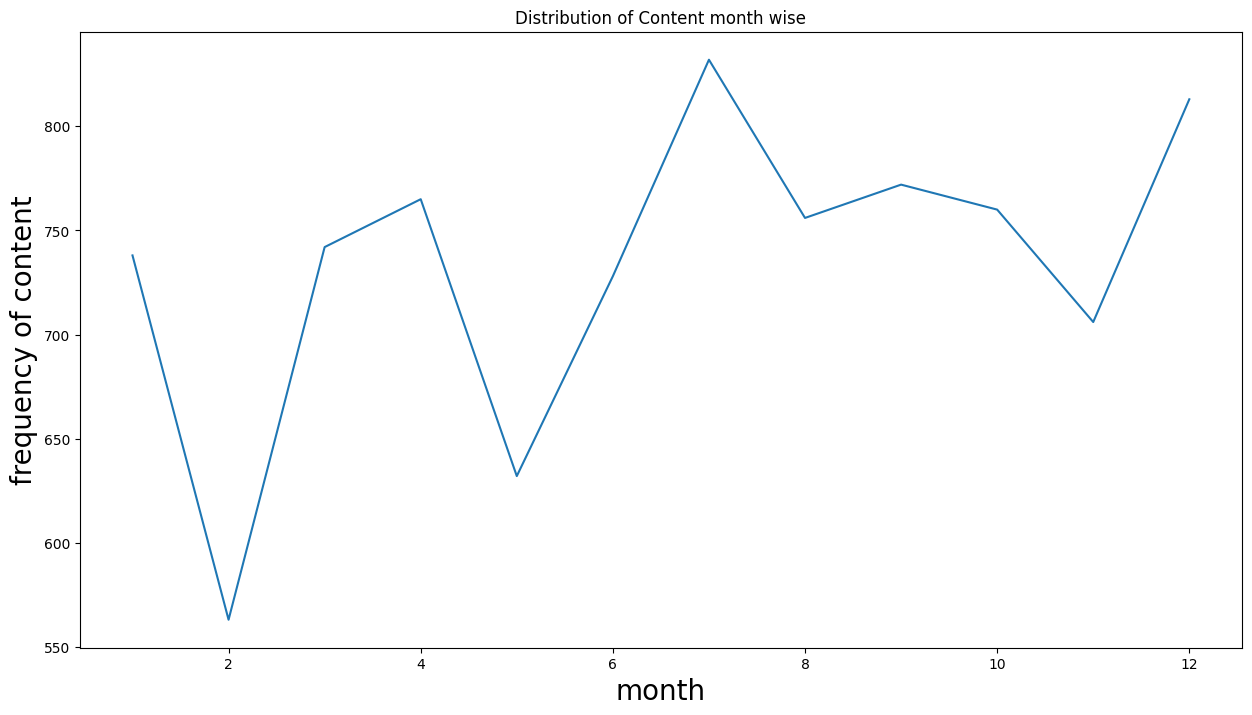

In [385]:
# month wise content upload on netflix
data=final_data.groupby("month").agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)
plt.figure(figsize=(15,8))
plt.title("Distribution of Content month wise")
sns.lineplot(data,x="month",y="title")
plt.xlabel('month',size=20)
plt.ylabel('frequency of content',size=20)
plt.show()

In [386]:
# month wise percentage content upload on netflix is almost same
final_data["month"].value_counts()/len(final_data)*100

month
7     10.078667
12     9.042977
1      9.037036
9      8.982083
10     8.796927
8      8.470674
4      8.469684
6      8.247397
3      7.842429
11     7.721136
5      6.845354
2      6.465635
Name: count, dtype: float64

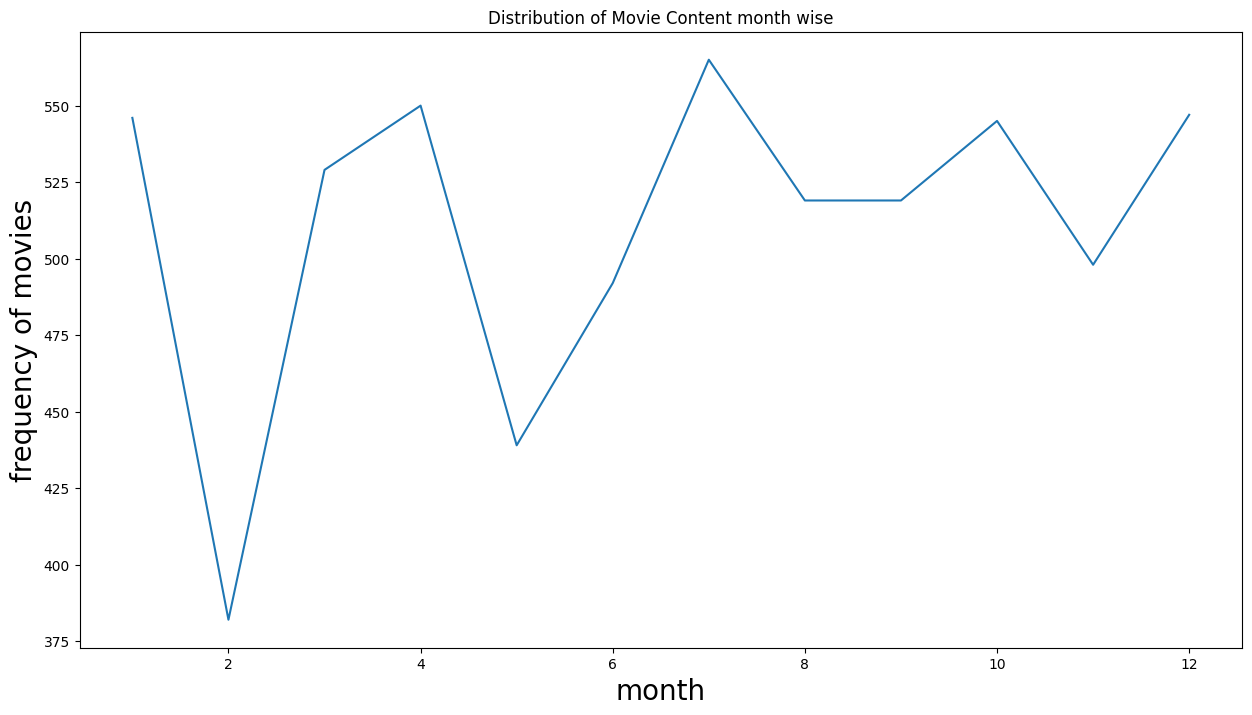

In [387]:
# MONTH WISE content upload on netflix only for movie type
movies_data=final_data[final_data["type"]=="Movie"]
data=movies_data.groupby("month").agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)
plt.figure(figsize=(15,8))
plt.title("Distribution of Movie Content month wise")
sns.lineplot(data,x="month",y="title")
plt.xlabel('month',size=20)
plt.ylabel('frequency of movies',size=20)
plt.show()

February and May are month where least content was uploaded AND April ,july ,october,are the months where most content were uploaded

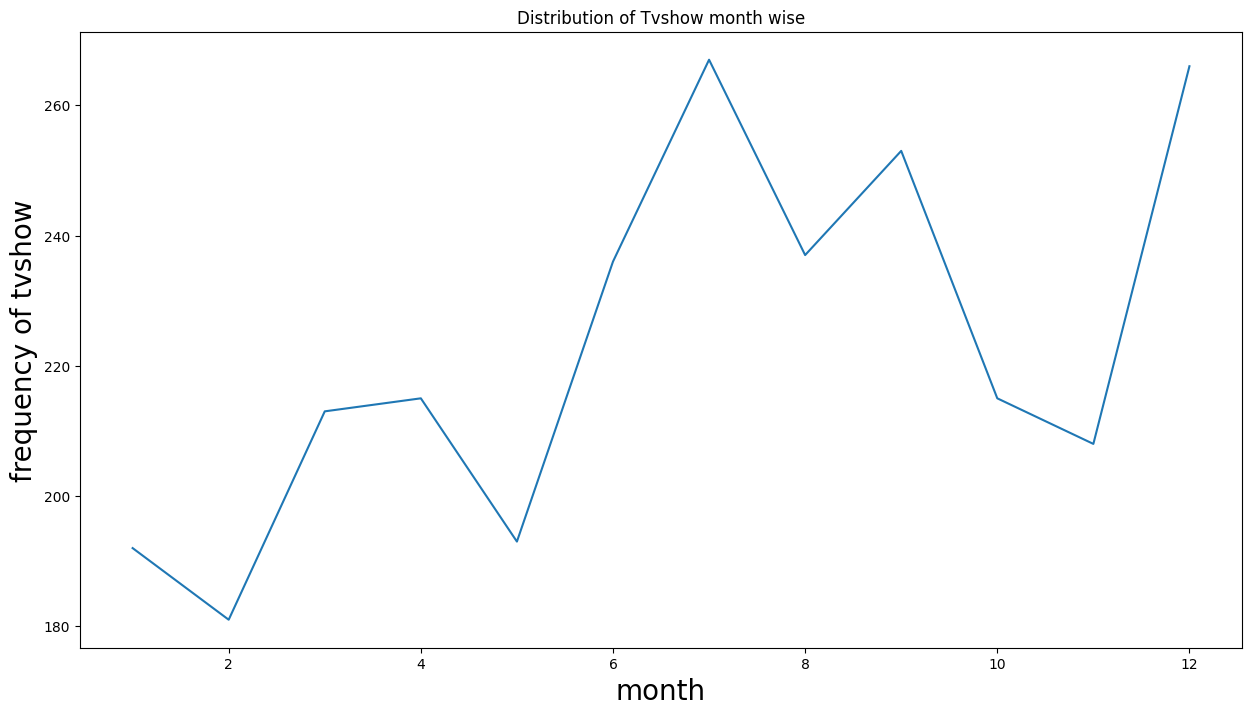

In [388]:
# month WISE content upload on netflix only for tvshow type
tv_data=final_data[final_data["type"]=="TV Show"]
data=tv_data.groupby("month").agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)
plt.figure(figsize=(15,8))
plt.title("Distribution of Tvshow month wise")
sns.lineplot(data,x="month",y="title")
plt.xlabel('month',size=20)
plt.ylabel('frequency of tvshow',size=20)
plt.show()

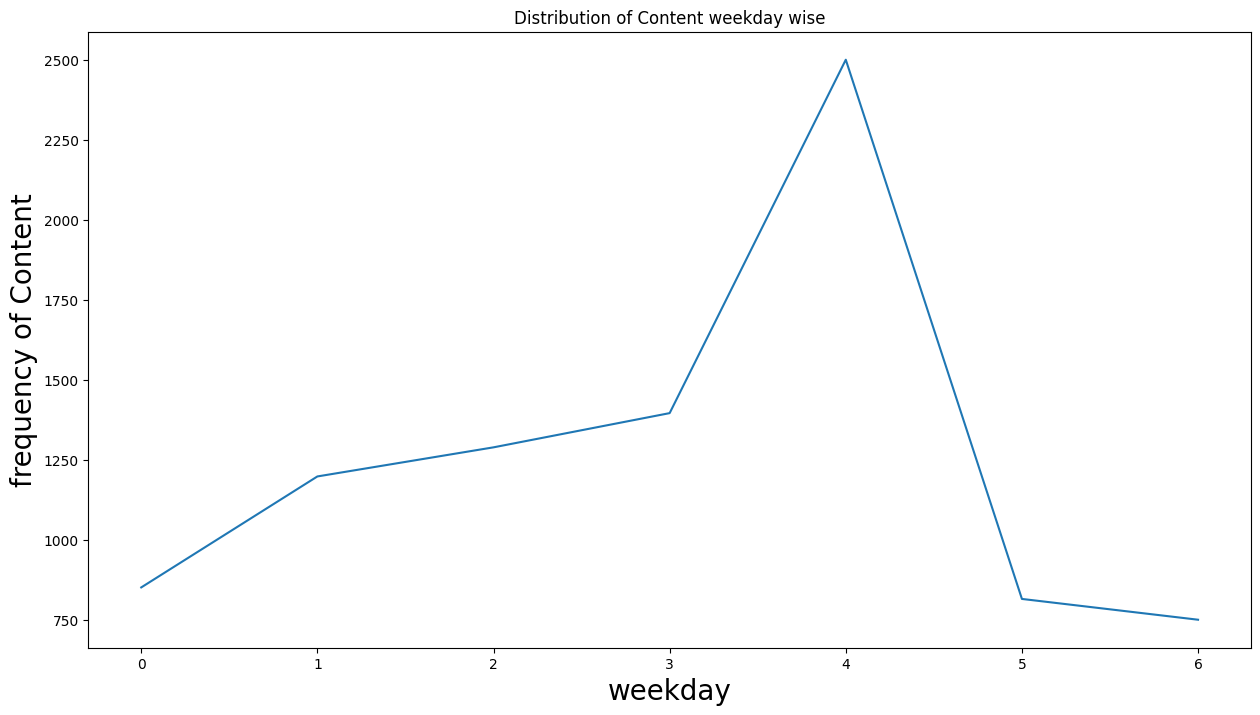

In [389]:
# weekday wise content upload on netflix
data=final_data.groupby("weekday").agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)
plt.figure(figsize=(15,8))
plt.title("Distribution of Content weekday wise")
sns.lineplot(data,x="weekday",y="title")
plt.xlabel('weekday',size=20)
plt.ylabel('frequency of Content',size=20)
plt.show()

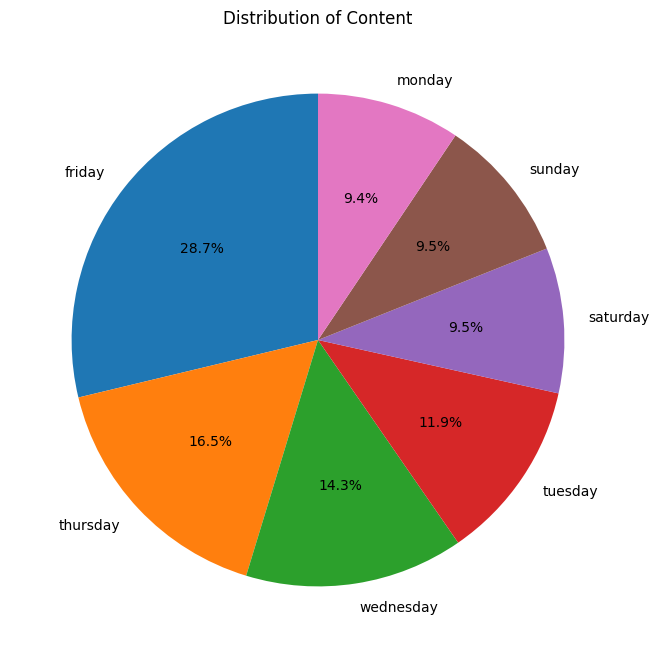

In [390]:
# weekday wise content upload on netflix
#monday=0,tuesday=1,wednesday=2,thursday=3,friday=4,saturday=5,sunday=0
weeklydata=final_data["weekday"].value_counts()/len(final_data)*100
weeklydata
y=["friday","thursday","wednesday","tuesday","saturday","sunday","monday"]
plt.figure(figsize=(10,8))
plt.title("Distribution of Content")
plt.pie(weeklydata,labels=y,autopct='%1.1f%%',startangle=90)
plt.show()

In [391]:
# mostly content upload on these days
weeklydata[[4,3]].sum()

45.292116975508804

**45% of content upload on thursday and friday**

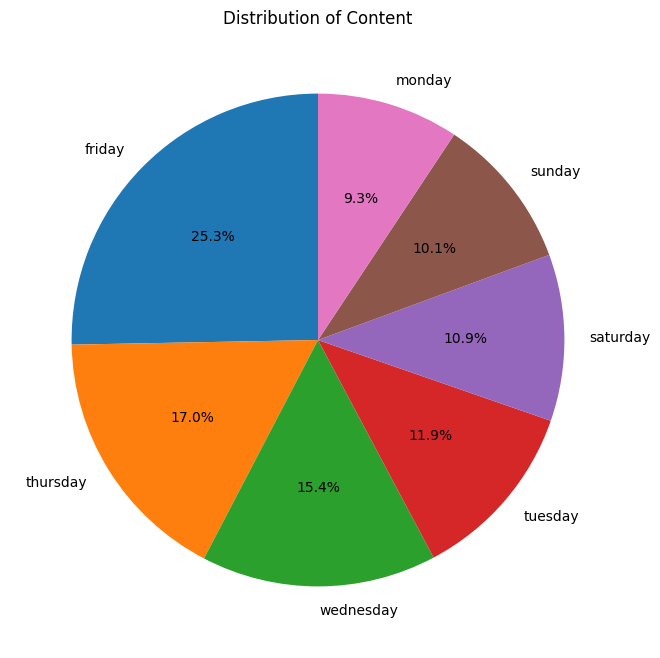

In [394]:
# weekday wise content upload on netflix for movies
#monday=0,tuesday=1,wednesday=2,thursday=3,friday=4,saturday=5,sunday=0
movies_data=final_data[final_data["type"]=="Movie"]
weeklydata=movies_data["weekday"].value_counts()/len(final_data)*100
weeklydata
y=["friday","thursday","wednesday","tuesday","saturday","sunday","monday"]
plt.figure(figsize=(10,8))
plt.title("Distribution of Content")
plt.pie(weeklydata,labels=y,autopct='%1.1f%%',startangle=90)
plt.show()

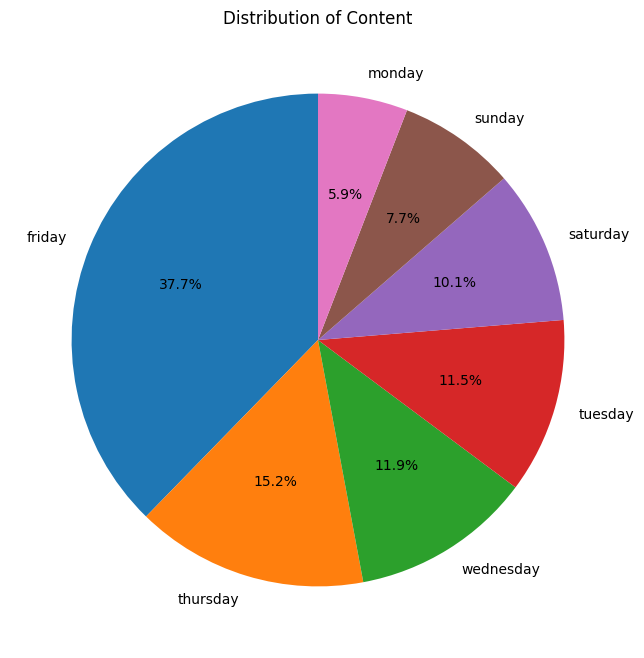

In [395]:
# weekday wise content upload on netflix for TVSHOWS
#monday=0,tuesday=1,wednesday=2,thursday=3,friday=4,saturday=5,sunday=0
tv_data=final_data[final_data["type"]=="TV Show"]
weeklydata=tv_data["weekday"].value_counts()/len(final_data)*100
weeklydata
y=["friday","thursday","wednesday","tuesday","saturday","sunday","monday"]
plt.figure(figsize=(10,8))
plt.title("Distribution of Content")
plt.pie(weeklydata,labels=y,autopct='%1.1f%%',startangle=90)
plt.show()

## **Analysis based on release year**

In [148]:
final_data.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year,month,weekday,day
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min,2021,9,5,25
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24


In [149]:
#number of distinct titles on the basis of rating
release_data=final_data[final_data["release_year"]>1980].groupby("release_year").agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
release_data.head()

,release_year,title
37,2018,1147
36,2017,1032
38,2019,1030
39,2020,953
35,2016,902


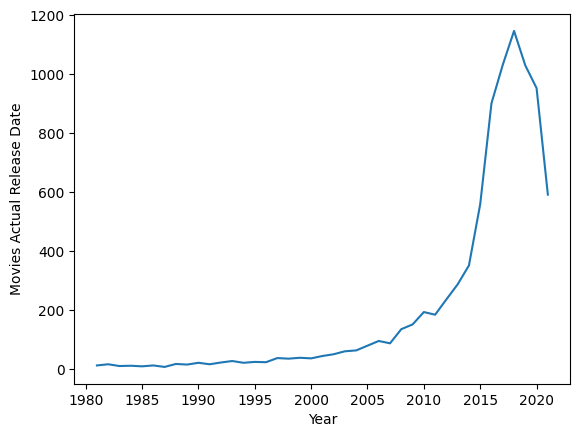

In [150]:
sns.lineplot(release_data, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

In [151]:
# find total content available on netflix
release_data1=final_data.groupby("release_year").agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
total_content=release_data["title"].sum()
# content whose release year after 2010
movieafter_2010=release_data[release_data["release_year"]>2008]["title"].sum()
# percentage of that content out of total content
movieafter_2010/total_content*100

87.8948581969103

**88% content available on netflix are those content whose release date after 2008**

In [398]:
# separate the dataset fro movies and tvshow
movies_data=final_data[final_data["type"]=="Movie"]
tv_data=final_data[final_data["type"]=="TV Show"]

In [403]:
# group the movies data according to release_year
data1=movies_data.groupby("release_year")['title'].nunique()
# sort the value and drop extra columns
data1_sort=data1.sort_values(ascending=False).reset_index()
data1_sort=data1_sort
data1_sorted=data1_sort.reset_index().drop(columns={"index"})
data1_sorted.head()

,release_year,title
0,2018,767
1,2017,767
2,2016,658
3,2019,633
4,2020,517


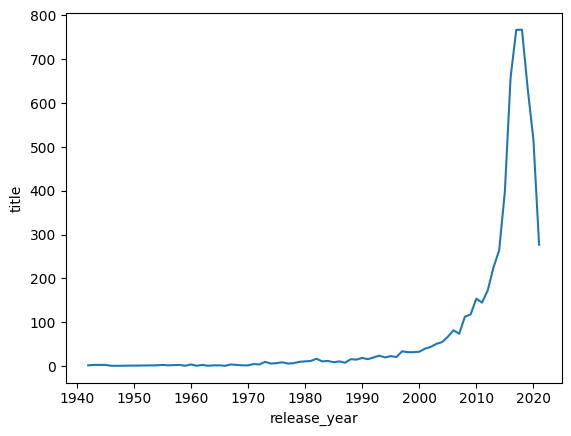

In [404]:
sns.lineplot(data1_sorted, x='release_year', y='title')
plt.show()

In [406]:
# group the movies data according to release_year
data1=tv_data.groupby("release_year")['title'].nunique()
# sort the value and drop extra columns
data1_sort=data1.sort_values(ascending=False).reset_index()
data1_sort=data1_sort
data1_sorted=data1_sort.reset_index().drop(columns={"index"})
data1_sorted.head()

,release_year,title
0,2020,436
1,2019,397
2,2018,380
3,2021,315
4,2017,265


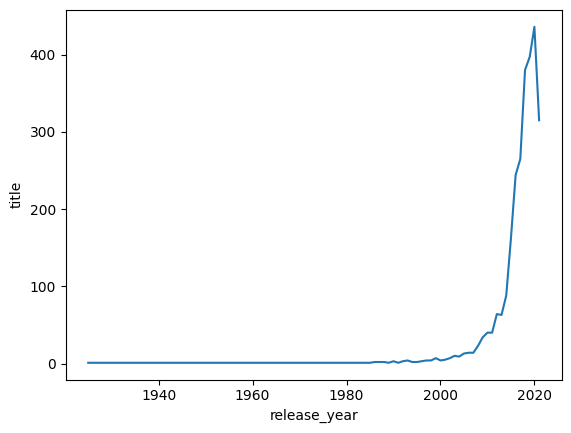

In [407]:
sns.lineplot(data1_sorted, x='release_year', y='title')
plt.show()

## **Analysis based on duration**

In [178]:
# need to separate data for movies and tv show and do analysis on them
final_data["duration"].value_counts()

duration
1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: count, Length: 220, dtype: int64

In [152]:
# create separate data for movies and tvshows
movies_data=final_data[final_data["type"]=="Movie"]
tv_data=final_data[final_data["type"]=="TV Show"]

In [153]:
# remove min from duration column for movie dataset
movies_data['duration']=movies_data['duration'].str.replace(" min","")
movies_data.head()

<ipython-input-153-3196f6f94408>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration']=movies_data['duration'].str.replace(" min","")


,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year,month,weekday,day
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,2021,9,5,25
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021,9,4,24
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021,9,4,24
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021,9,4,24
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021,9,4,24


In [154]:
# mins removed from duration column
movies_data["duration"].unique()

array(['90', '91', '125', '104', '127', '67', '94', '161', '61', '166',
       '147', '103', '97', '106', '111', '110', '105', '96', '124', '116',
       '98', '23', '115', '122', '99', '88', '100', '102', '93', '95',
       '85', '83', '113', '13', '182', '48', '145', '87', '92', '80',
       '117', '128', '119', '143', '114', '118', '108', '63', '121',
       '142', '154', '120', '82', '109', '101', '86', '229', '76', '89',
       '156', '112', '107', '129', '135', '136', '165', '150', '133',
       '70', '84', '140', '78', '64', '59', '139', '69', '148', '189',
       '141', '130', '138', '81', '132', '123', '65', '68', '66', '62',
       '74', '131', '39', '46', '38', '126', '155', '159', '137', '12',
       '273', '36', '34', '77', '60', '49', '58', '72', '204', '212',
       '25', '73', '29', '47', '32', '35', '71', '149', '33', '15', '54',
       '224', '162', '37', '75', '79', '55', '158', '164', '173', '181',
       '185', '21', '24', '51', '151', '42', '22', '134', '177', '52

In [155]:
# CONVERT THE str of mins into int
movies_data["duration"]=movies_data["duration"].apply(lambda x : int(x))
movies_data["duration"].unique()

<ipython-input-155-142e59ca73f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data["duration"]=movies_data["duration"].apply(lambda x : int(x))


array([ 90,  91, 125, 104, 127,  67,  94, 161,  61, 166, 147, 103,  97,
       106, 111, 110, 105,  96, 124, 116,  98,  23, 115, 122,  99,  88,
       100, 102,  93,  95,  85,  83, 113,  13, 182,  48, 145,  87,  92,
        80, 117, 128, 119, 143, 114, 118, 108,  63, 121, 142, 154, 120,
        82, 109, 101,  86, 229,  76,  89, 156, 112, 107, 129, 135, 136,
       165, 150, 133,  70,  84, 140,  78,  64,  59, 139,  69, 148, 189,
       141, 130, 138,  81, 132, 123,  65,  68,  66,  62,  74, 131,  39,
        46,  38, 126, 155, 159, 137,  12, 273,  36,  34,  77,  60,  49,
        58,  72, 204, 212,  25,  73,  29,  47,  32,  35,  71, 149,  33,
        15,  54, 224, 162,  37,  75,  79,  55, 158, 164, 173, 181, 185,
        21,  24,  51, 151,  42,  22, 134, 177,  52,  14,  53,   8,  57,
        28,  50,   9,  26,  45, 171,  27,  44, 146,  20, 157,  17, 203,
        41,  30, 194, 233, 237, 230, 195, 253, 152, 190, 160, 208, 180,
       144,   5, 174, 170, 192, 209, 187, 172,  16, 186,  11, 19

In [156]:
movies_data["duration"].min()

3

In [157]:
movies_data["duration"].max()

312

In [158]:
# create bin for duration
bin=[1,35,60,80,121,150,180,200,312]
label=["1-34","35-59","60-79","80-120","121-149","150-179","180-199","200-312"]
movies_data["copy_of_duration"]=pd.cut(movies_data["duration"],bins=bin,labels=label)
movies_data.head()

<ipython-input-158-db3cf2415cb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data["copy_of_duration"]=pd.cut(movies_data["duration"],bins=bin,labels=label)


,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year,month,weekday,day,copy_of_duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,2021,9,5,25,80-120
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021,9,4,24,80-120
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021,9,4,24,80-120
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021,9,4,24,80-120
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021,9,4,24,80-120


In [159]:
# group the movie data based on the duration
movie_data=movies_data.groupby("copy_of_duration").agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
movie_data

,copy_of_duration,title
3,80-120,3948
4,121-149,843
2,60-79,608
1,35-59,332
5,150-179,198
0,1-34,155
6,180-199,28
7,200-312,19


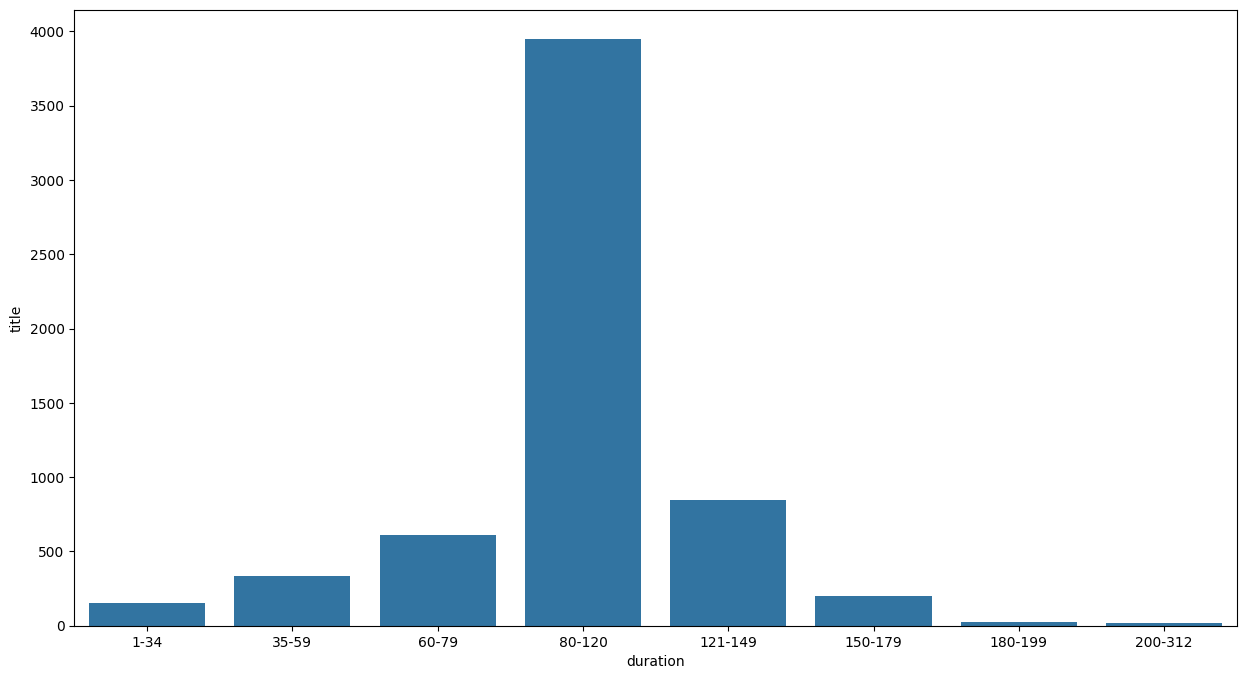

In [176]:
plt.figure(figsize=(15,8))
sns.barplot(movie_data,x="copy_of_duration",y="title")
plt.xlabel('duration')
plt.ylabel('title')
plt.show()

In [161]:
# top duration for movies
top_duration=["80-120","60-79","121-149"]
# find total movies in top duration
topcon_content=movie_data[movie_data["copy_of_duration"].isin(top_duration)]["title"].sum()
# total movies from all duration
total_content=movie_data["title"].sum()
# percentage of movies from top duration
topcon_content/total_content*100

88.0606752568912

**88% Movies on netflix are of duration betwwen 60-150 mins**

In [162]:
# top duration for movies
top_duration=["80-120"]
# find total movies in top duration
topcon_content=movie_data[movie_data["copy_of_duration"].isin(top_duration)]["title"].sum()
# total movies from all duration
total_content=movie_data["title"].sum()
# percentage of movies from top duration
topcon_content/total_content*100

64.3940629587343

64% Movies on netflix are of duration betwwen 80-120 mins

In [163]:
tv_data.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year,month,weekday,day
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
5,Blood & Water,Khosi Ngema,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24


In [164]:
# remove min from duration column for movie dataset
tv_data['duration']=tv_data['duration'].str.replace(" Seasons","")
tv_data['duration']=tv_data['duration'].str.replace(" Season","")
tv_data.head()

<ipython-input-164-0ddc6c45b682>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data['duration']=tv_data['duration'].str.replace(" Seasons","")
<ipython-input-164-0ddc6c45b682>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data['duration']=tv_data['duration'].str.replace(" Season","")


,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year,month,weekday,day
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021,9,4,24
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021,9,4,24
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021,9,4,24
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021,9,4,24
5,Blood & Water,Khosi Ngema,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021,9,4,24


In [165]:
# season removed from duration column
tv_data["duration"].unique()

array(['2', '1', '9', '4', '5', '3', '6', '7', '10', '8', '17', '13',
       '15', '12', '11'], dtype=object)

In [166]:
# CONVERT THE str of mins into int
tv_data["duration"]=tv_data["duration"].apply(lambda x : int(x))
tv_data["duration"].unique()

<ipython-input-166-e94613bac62b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data["duration"]=tv_data["duration"].apply(lambda x : int(x))


array([ 2,  1,  9,  4,  5,  3,  6,  7, 10,  8, 17, 13, 15, 12, 11])

In [167]:
tv_data["duration"].min()

1

In [168]:
tv_data["duration"].max()

17

In [169]:
# group the movie data based on the duration
tvs_data=tv_data.groupby("duration").agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
tvs_data

,duration,title
0,1,1793
1,2,425
2,3,199
3,4,95
4,5,65
5,6,33
6,7,23
7,8,17
8,9,9
9,10,7


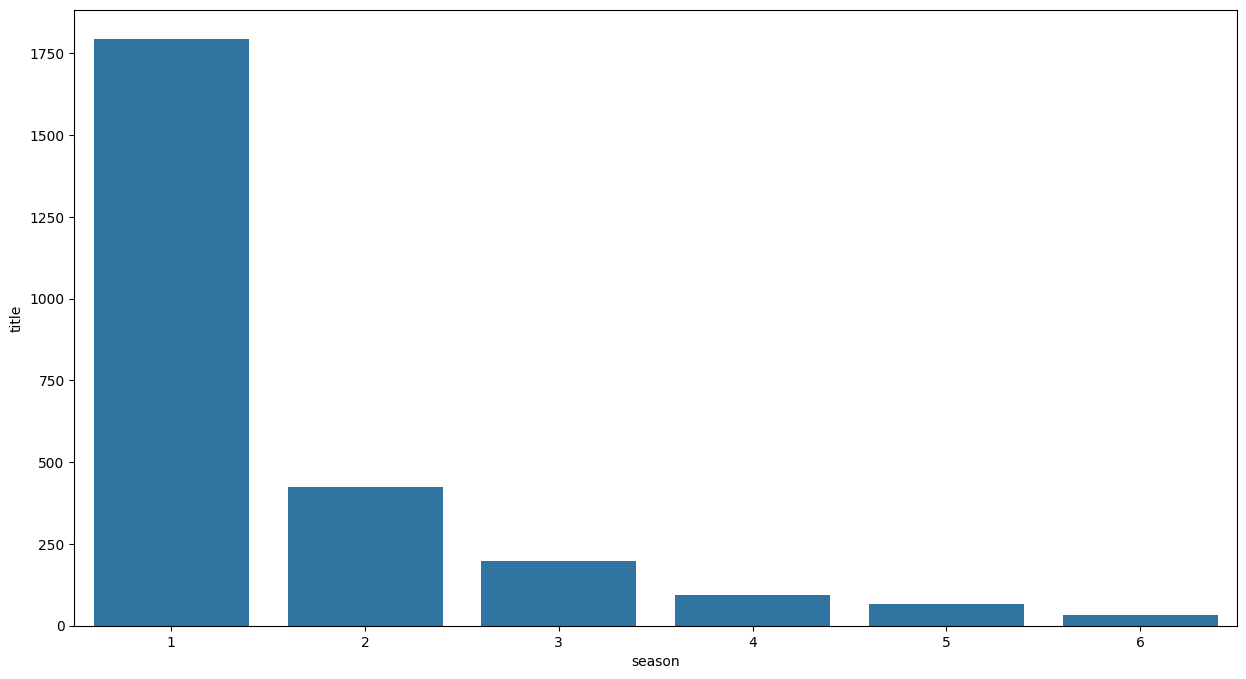

In [170]:
plt.figure(figsize=(15,8))
sns.barplot(tvs_data[:6],x="duration",y="title")
plt.xlabel('season')
plt.ylabel('title')
plt.show()

In [171]:
# top season
top_season=[1,2,3]
# find total tvshows in top duration
topcon_content=tvs_data[tvs_data["duration"].isin(top_season)]["title"].sum()
# total tvshows from all duration
total_content=tvs_data["title"].sum()
# percentage of tvshows from top season
topcon_content/total_content*100

90.32137518684604

**90% of Tv-shows has 3 seasons on netflix**  

In [172]:
# top season
top_season=[1]
# find total tvshows in top duration
topcon_content=tvs_data[tvs_data["duration"].isin(top_season)]["title"].sum()
# total tvshows from all duration
total_content=tvs_data["title"].sum()
# percentage of tvshows from top season
topcon_content/total_content*100

67.00298953662183

**67% of Tv-shows has only 1 season on netflix**

## **Analysis based on rating**

In [136]:
final_data

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year,month,weekday,day
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min,2021,9,5,25
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,4,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019,3,5,2
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019,3,5,2
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019,3,5,2
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019,3,5,2


In [137]:
#number of distinct titles on the basis of rating
rating_data=final_data.groupby("rating").agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
rating_data

,rating,title
8,TV-MA,3207
6,TV-14,2160
9,TV-PG,863
5,R,799
4,PG-13,490
11,TV-Y7,334
10,TV-Y,307
3,PG,287
7,TV-G,220
2,NR,87


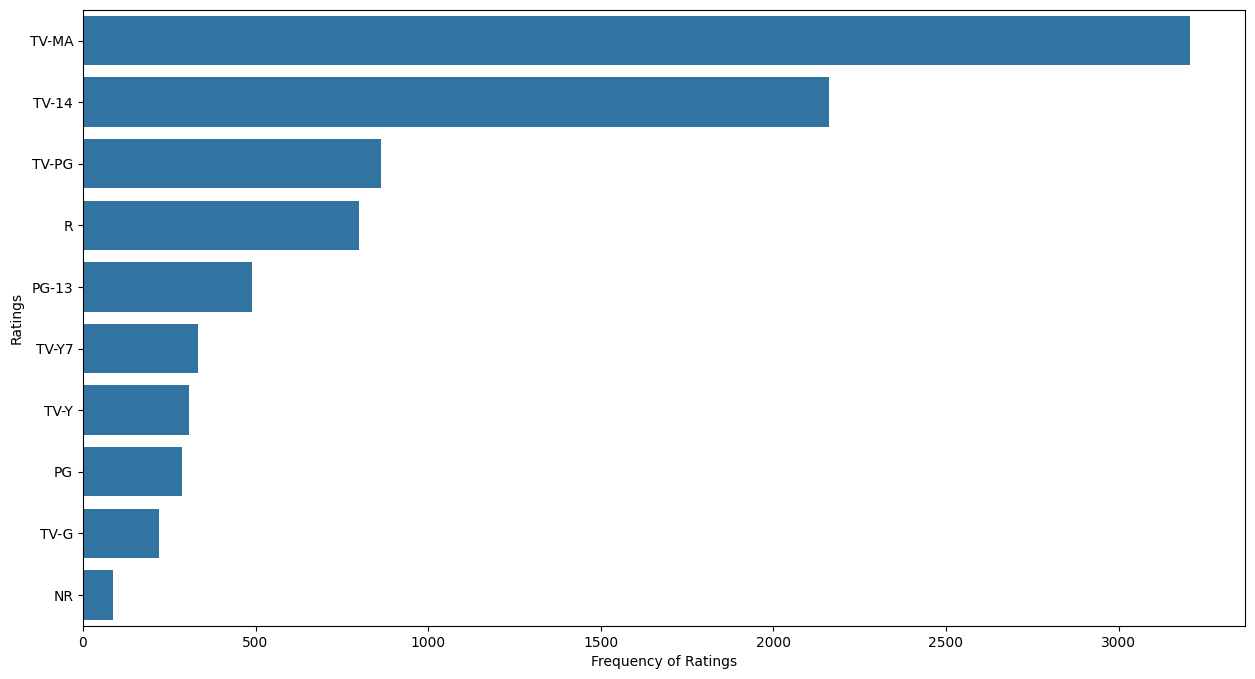

In [138]:
plt.figure(figsize=(15,8))
sns.barplot(rating_data[:10],x="title",y="rating")
plt.xlabel('Frequency of Ratings')
plt.ylabel('Ratings')
plt.show()

In [139]:
# top RATING
popular=["TV-MA","TV-14","TV-PG"]
# find total content in top rating
top_content=rating_data[rating_data["rating"].isin(popular)]["title"].sum()
# total content available in all rating
total_content=rating_data["title"].sum()
# percentage of content from top 3 genre
top_content/total_content*100

70.73918473941183

**71% of content available on netflix are from rating tv-ma,tv-14,tv-pg Most of the highly rated content on Netflix is intended for Mature Audiences,parential guidance is recomm and unsuitable for children below 14**

In [140]:
# top RATING
popular=["TV-MA","TV-14"]
# find total content in top rating
top_content=rating_data[rating_data["rating"].isin(popular)]["title"].sum()
# total content available in all rating
total_content=rating_data["title"].sum()
# percentage of content from top 3 genre
top_content/total_content*100

60.940161235380955

**60% of content available on netflix are from rating tv-ma,tv-14-- These content are for mature audience and not suitable for children below 14**

In [409]:
# separate the dataset fro movies and tvshow
movies_data=final_data[final_data["type"]=="Movie"]
tv_data=final_data[final_data["type"]=="TV Show"]

In [410]:
# group the movies data according to rating
data1=movies_data.groupby("rating")['title'].nunique()
# sort the value and drop extra columns
data1_sort=data1.sort_values(ascending=False).reset_index()
data1_sort=data1_sort
data1_sorted=data1_sort.reset_index().drop(columns={"index"})
data1_sorted.head()

,rating,title
0,TV-MA,2062
1,TV-14,1427
2,R,797
3,TV-PG,540
4,PG-13,490


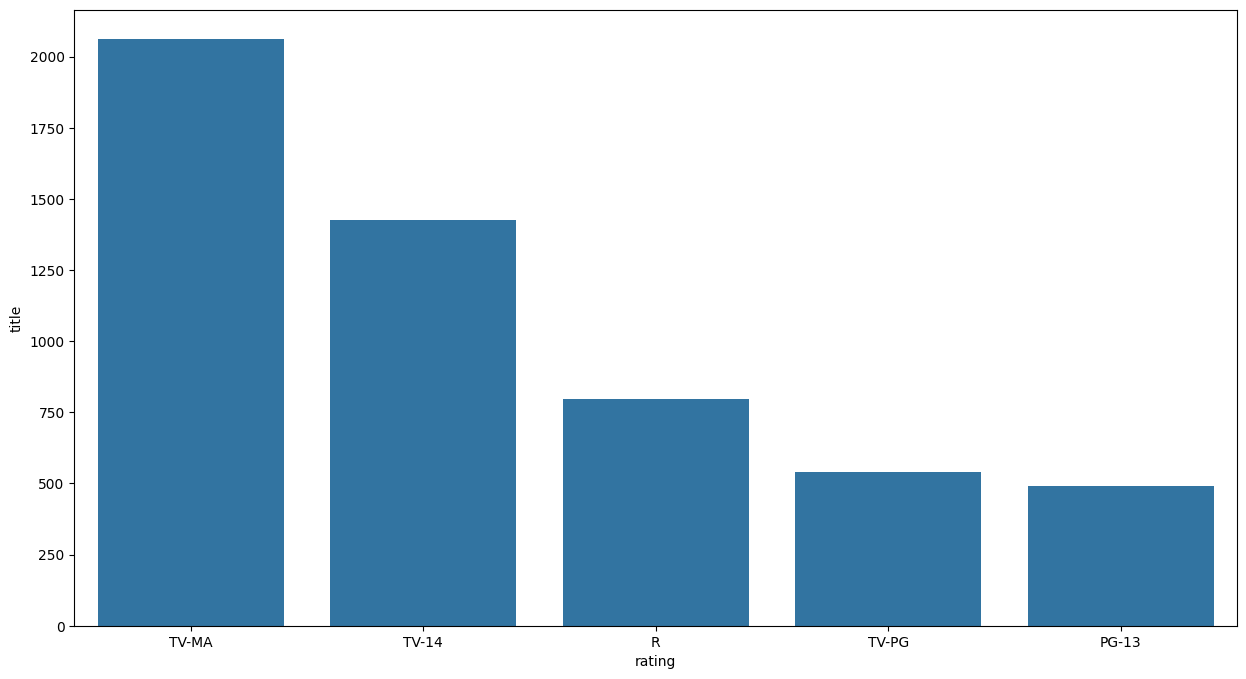

In [411]:
# visual presentation of data
plt.figure(figsize=(15,8))
sns.barplot(data1_sorted[:5],x="rating",y="title")
plt.show()


In [412]:
# group the movies data according to rating
data1=tv_data.groupby("rating")['title'].nunique()
# sort the value and drop extra columns
data1_sort=data1.sort_values(ascending=False).reset_index()
data1_sort=data1_sort
data1_sorted=data1_sort.reset_index().drop(columns={"index"})
data1_sorted.head()

,rating,title
0,TV-MA,1145
1,TV-14,733
2,TV-PG,323
3,TV-Y7,195
4,TV-Y,176


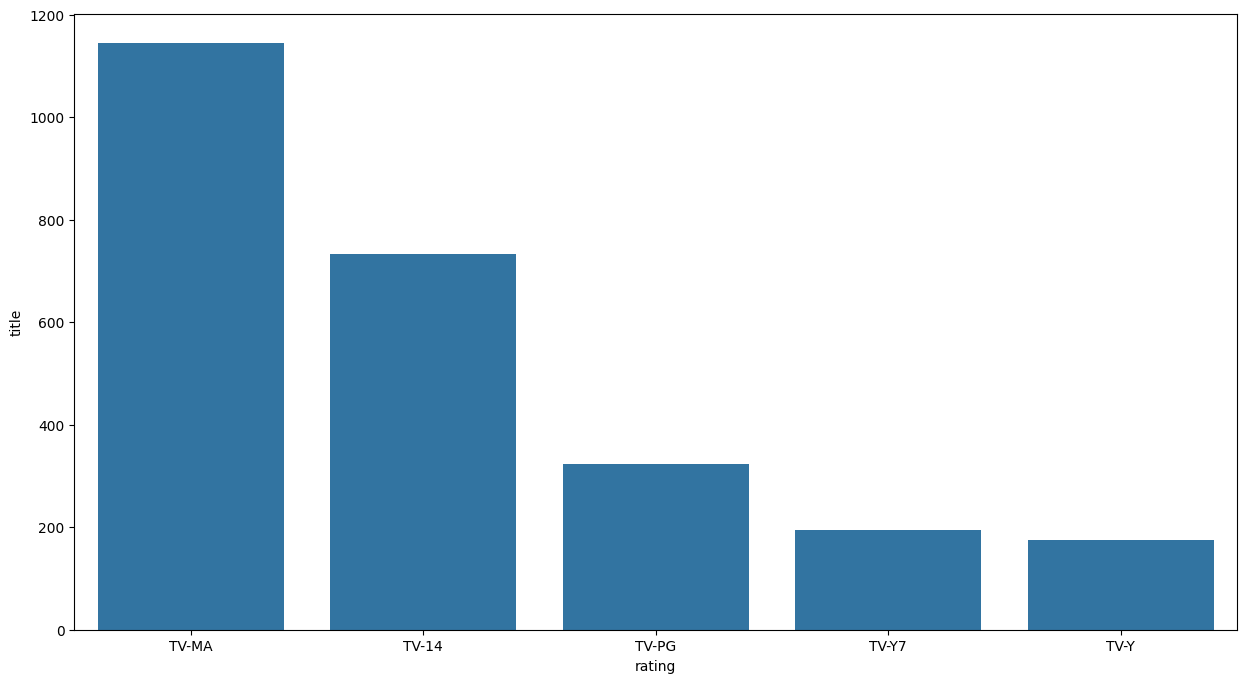

In [413]:
# visual presentation of data
plt.figure(figsize=(15,8))
sns.barplot(data1_sorted[:5],x="rating",y="title")
plt.show()

# **Insights from netflix data:**

In [173]:
  ''' *Movies are majorly added to Netflix, followed by TV shows, and both are in the ratio of 72% movies and 28% TV shows.
      *94% of the content available on Netflix was uploaded after 2016.
      *February and May are the months where the least content was uploaded on Netflix from 2008 to 2021.
      *April, July, and October are the months where the most content was uploaded from 2008 to 2021.
      *45% of the of the content available on Netflix was uploaded on Thursday and Friday, and Friday is the day where most content was uploaded.
      *International movies, dramas, and comedies are the most popular genres, and 45% of the content is from these three genres.
      *56% of the of the content available on Netflix is from 3 countries. The United States,India, the United Kingdom, and the United States is top among them.
      *71% of the content available on Netflix is rated TV-MA, TV-14, and TV-PG, and 60% of the content is rated TV-MA,TV-14, which is for mature and above 14-year-old audiences.
      *Anupam Kher,Shah Rukh Khan, Julie Tejwani, and Naseeruddin Shah are top actors; their movies are more on Netflix than those of other actors.
      *Rajiv Chilaka, Jan Suter, and Raul Campos are the most popular directors on Netflix.
      *88% of the of the content available on Netflix is content whose release date is after 2010.
      *88% Movies on netflix are of duration betwwen 60-150 mins and 64% of them are of duration 80-120 mins
      *90% of TV shows have three seasons on Netflix, and 67% of them have only one season on Netflix.'''

' *Movies are majorly added to Netflix, followed by TV shows, and both are in the ratio of 72% movies and 28% TV shows.\n    *94% of the content available on Netflix was uploaded after 2016.\n    *February and May are the months where the least content was uploaded on Netflix from 2008 to 2021.\n    *April, July, and October are the months where the most content was uploaded from 2008 to 2021.\n    *45% of the of the content available on Netflix was uploaded on Thursday and Friday, and Friday is the day where most content was uploaded.\n    *International movies, dramas, and comedies are the most popular genres, and 45% of the content is from these three genres.\n    *56% of the of the content available on Netflix is from 3 countries. The United States,India, the United Kingdom, and the United States is top among them.\n    *71% of the content available on Netflix is rated TV-MA, TV-14, and TV-PG, and 60% of the content is rated TV-MA,TV-14, which is for mature and above 14-year-old au

# **Recommendations:**

In [174]:
  ''' *Focus on adding more movies, since movies are majorly released compared to TV shows. It would beneficial for Netflix to target audience.
      *Focus on acquiring more content from these genres international movies, dramas, and comedies as they are the most popular genres on Netflix.
      *The duration of the movie should be between 80-120 minutes. Short movies will be more preferred by the users
      *While creating content, take into consideration the popular actors/directors
      *Plan content releases strategically around Thursday and Friday to maximize the views, as 45% of the content is uploaded on these 2 days.
      *Leverage the fact that 94% of the content was added after 2016 by focusing on recent and newer releases, which seem to attract more viewers.
      *Continue prioritizing content rated TV-MA, TV-14, and TV-PG, which collectively make up 71% of the content. Netflix can focus on adding and promoting adult oriented content to attract the customer.'''


' *Focus on adding more movies, since movies are majorly released compared to TV shows. It would beneficial for Netflix to target audience.\n    *Focus on acquiring more content from these genres international movies, dramas, and comedies as they are the most popular genres on Netflix.\n    *The duration of the movie should be between 80-120 minutes. Short movies will be more preferred by the users\n    *While creating content, take into consideration the popular actors/directors\n    *Plan content releases strategically around Thursday and Friday to maximize the views, as 45% of the content is uploaded on these 2 days.\n    *Leverage the fact that 94% of the content was added after 2016 by focusing on recent and newer releases, which seem to attract more viewers.\n    *Continue prioritizing content rated TV-MA, TV-14, and TV-PG, which collectively make up 71% of the content. Netflix can focus on adding and promoting adult oriented content to attract the customer.'